# Desafío Spike

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['axes.linewidth'] = 0.3
matplotlib.rcParams['xtick.major.width'] = 0.3
matplotlib.rcParams['ytick.major.width'] = 0.3
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["figure.dpi"] = 300



## 1. Datos

### Precipitaciones

Aquí tengo la duda de si las precipitaciones es un acumulado mensual o una media de la precipitación diaria en mm/día, no queda muy claro en el enunciado

In [2]:
pp_mm = pd.read_csv('precipitaciones.csv')

### Banco central

In [3]:
bco_central = pd.read_csv('banco_central.csv')

## 2. Análisis exploratorio y limpieza de datos

##### Precipitaciones

In [4]:
print(pp_mm.info())
pp_mm

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 496 non-null    object 
 1   Coquimbo                             496 non-null    float64
 2   Valparaiso                           496 non-null    float64
 3   Metropolitana_de_Santiago            496 non-null    float64
 4   Libertador_Gral__Bernardo_O_Higgins  496 non-null    float64
 5   Maule                                496 non-null    float64
 6   Biobio                               496 non-null    float64
 7   La_Araucania                         496 non-null    float64
 8   Los_Rios                             496 non-null    float64
dtypes: float64(8), object(1)
memory usage: 35.0+ KB
None


,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.000000,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.000000,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.000000,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.000000,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.000000,12.080715,56.233424,96.364235,155.622235
...,...,...,...,...,...,...,...,...,...
491,1988-10-01,0.000000,0.019886,4.621711,8.260992,27.616980,69.572460,133.732635,181.879767
492,2019-08-01,0.000000,0.430990,4.509748,9.900806,49.285557,108.404827,155.448370,233.621020
493,2015-06-01,0.000000,0.325714,4.888708,33.152636,117.695499,255.274275,343.280205,386.836253
494,2016-09-01,0.000000,0.035860,1.066980,3.090961,18.736997,45.646802,74.499307,119.114419


In [5]:
for c in pp_mm.columns:
    print(pp_mm[c].value_counts())

1989-02-01    1
2002-07-01    1
1988-09-01    1
2012-06-01    1
2006-06-01    1
             ..
2004-01-01    1
2016-05-01    1
2009-05-01    1
2017-08-01    1
1982-04-01    1
Name: date, Length: 496, dtype: int64
0.000000     5
17.263150    1
5.071111     1
11.719176    1
0.781072     1
            ..
35.123575    1
5.200575     1
18.833954    1
2.296366     1
19.659797    1
Name: Coquimbo, Length: 492, dtype: int64
0.000000     7
0.534140     1
0.662662     1
6.440909     1
21.938133    1
            ..
22.233003    1
0.090422     1
3.587419     1
45.566656    1
0.019610     1
Name: Valparaiso, Length: 490, dtype: int64
0.000000      3
0.028272      1
192.094849    1
19.893104     1
25.707416     1
             ..
59.984144     1
1.794530      1
4.261023      1
76.946007     1
6.848607      1
Name: Metropolitana_de_Santiago, Length: 494, dtype: int64
0.000000      8
5.897829      1
2.175643      1
26.176713     1
36.280636     1
             ..
0.017628      1
9.627132      1
141.555

##### Verifico la fecha inicial y final del dataframe

In [6]:
pp_mm.date.str.len().value_counts()

10    496
Name: date, dtype: int64

In [7]:
pp_mm.date = pd.to_datetime(pp_mm.date, format = '%Y-%m-%d')
print(pp_mm.date.min())
print(pp_mm.date.max())

pp_mm = pp_mm.set_index('date')

1979-01-01 00:00:00
2020-04-01 00:00:00


El dataframe de precipitaciones consiste en:
- una columna donde sale la fecha como string (de largo 10) en el formato '%Y-%m-%d'. Los valores van entre 1979-01-01 y 2020-04-01
- 8 columnas con los valores de precipitación en mm (float64) sin ningún nulo

In [8]:
print(bco_central.info())
bco_central

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 85 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Periodo                                                                             614 non-null    object 
 1   Imacec_empalmado                                                                    300 non-null    object 
 2   Imacec_produccion_de_bienes                                                         300 non-null    object 
 3   Imacec_minero                                                                       300 non-null    object 
 4   Imacec_industria                                                                    301 non-null    object 
 5   Imacec_resto_de_bienes                                                              300 non-null   

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,579.846.819,570.624.122,123.491.343,110.356.254,131.350.889,130.648.285,367.818.436,162.692.807,330.305.467,643.366.109,974.948.182,103.469.519,184.460.073,807.709.837,212.409.058,301.314.934,710.242.818,115.489.064,202.838.669,546.694.889,337.915.263,5.691.837,11.393.886,793.471.519,140.103.913,512.994.015,108.482.797,896.688.023,659.936.009,118.109.613,7.638.022,1593.60,288.1570,347.586.864,301.11,3.8117,109.24,76.520.246,92.91,89.171,472.484,799.068.585,798.092.771,258.428.756,901.504.814,360.108.494,18.951.548,229.653.619,547.033.124,19.153.327,155.736.824,498.854.717,341.857.582,682.423.108,151.916.628,349.444.258,445.435.266,587.837.412,362.517.856,82.567.788,201.875.908,416.124.956,190.085.519,NaN,93.621,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,374.895.706,606.504.665,11.702.736,10.358.806,134.393.001,133.442.735,38.211.344,188

<AxesSubplot:>

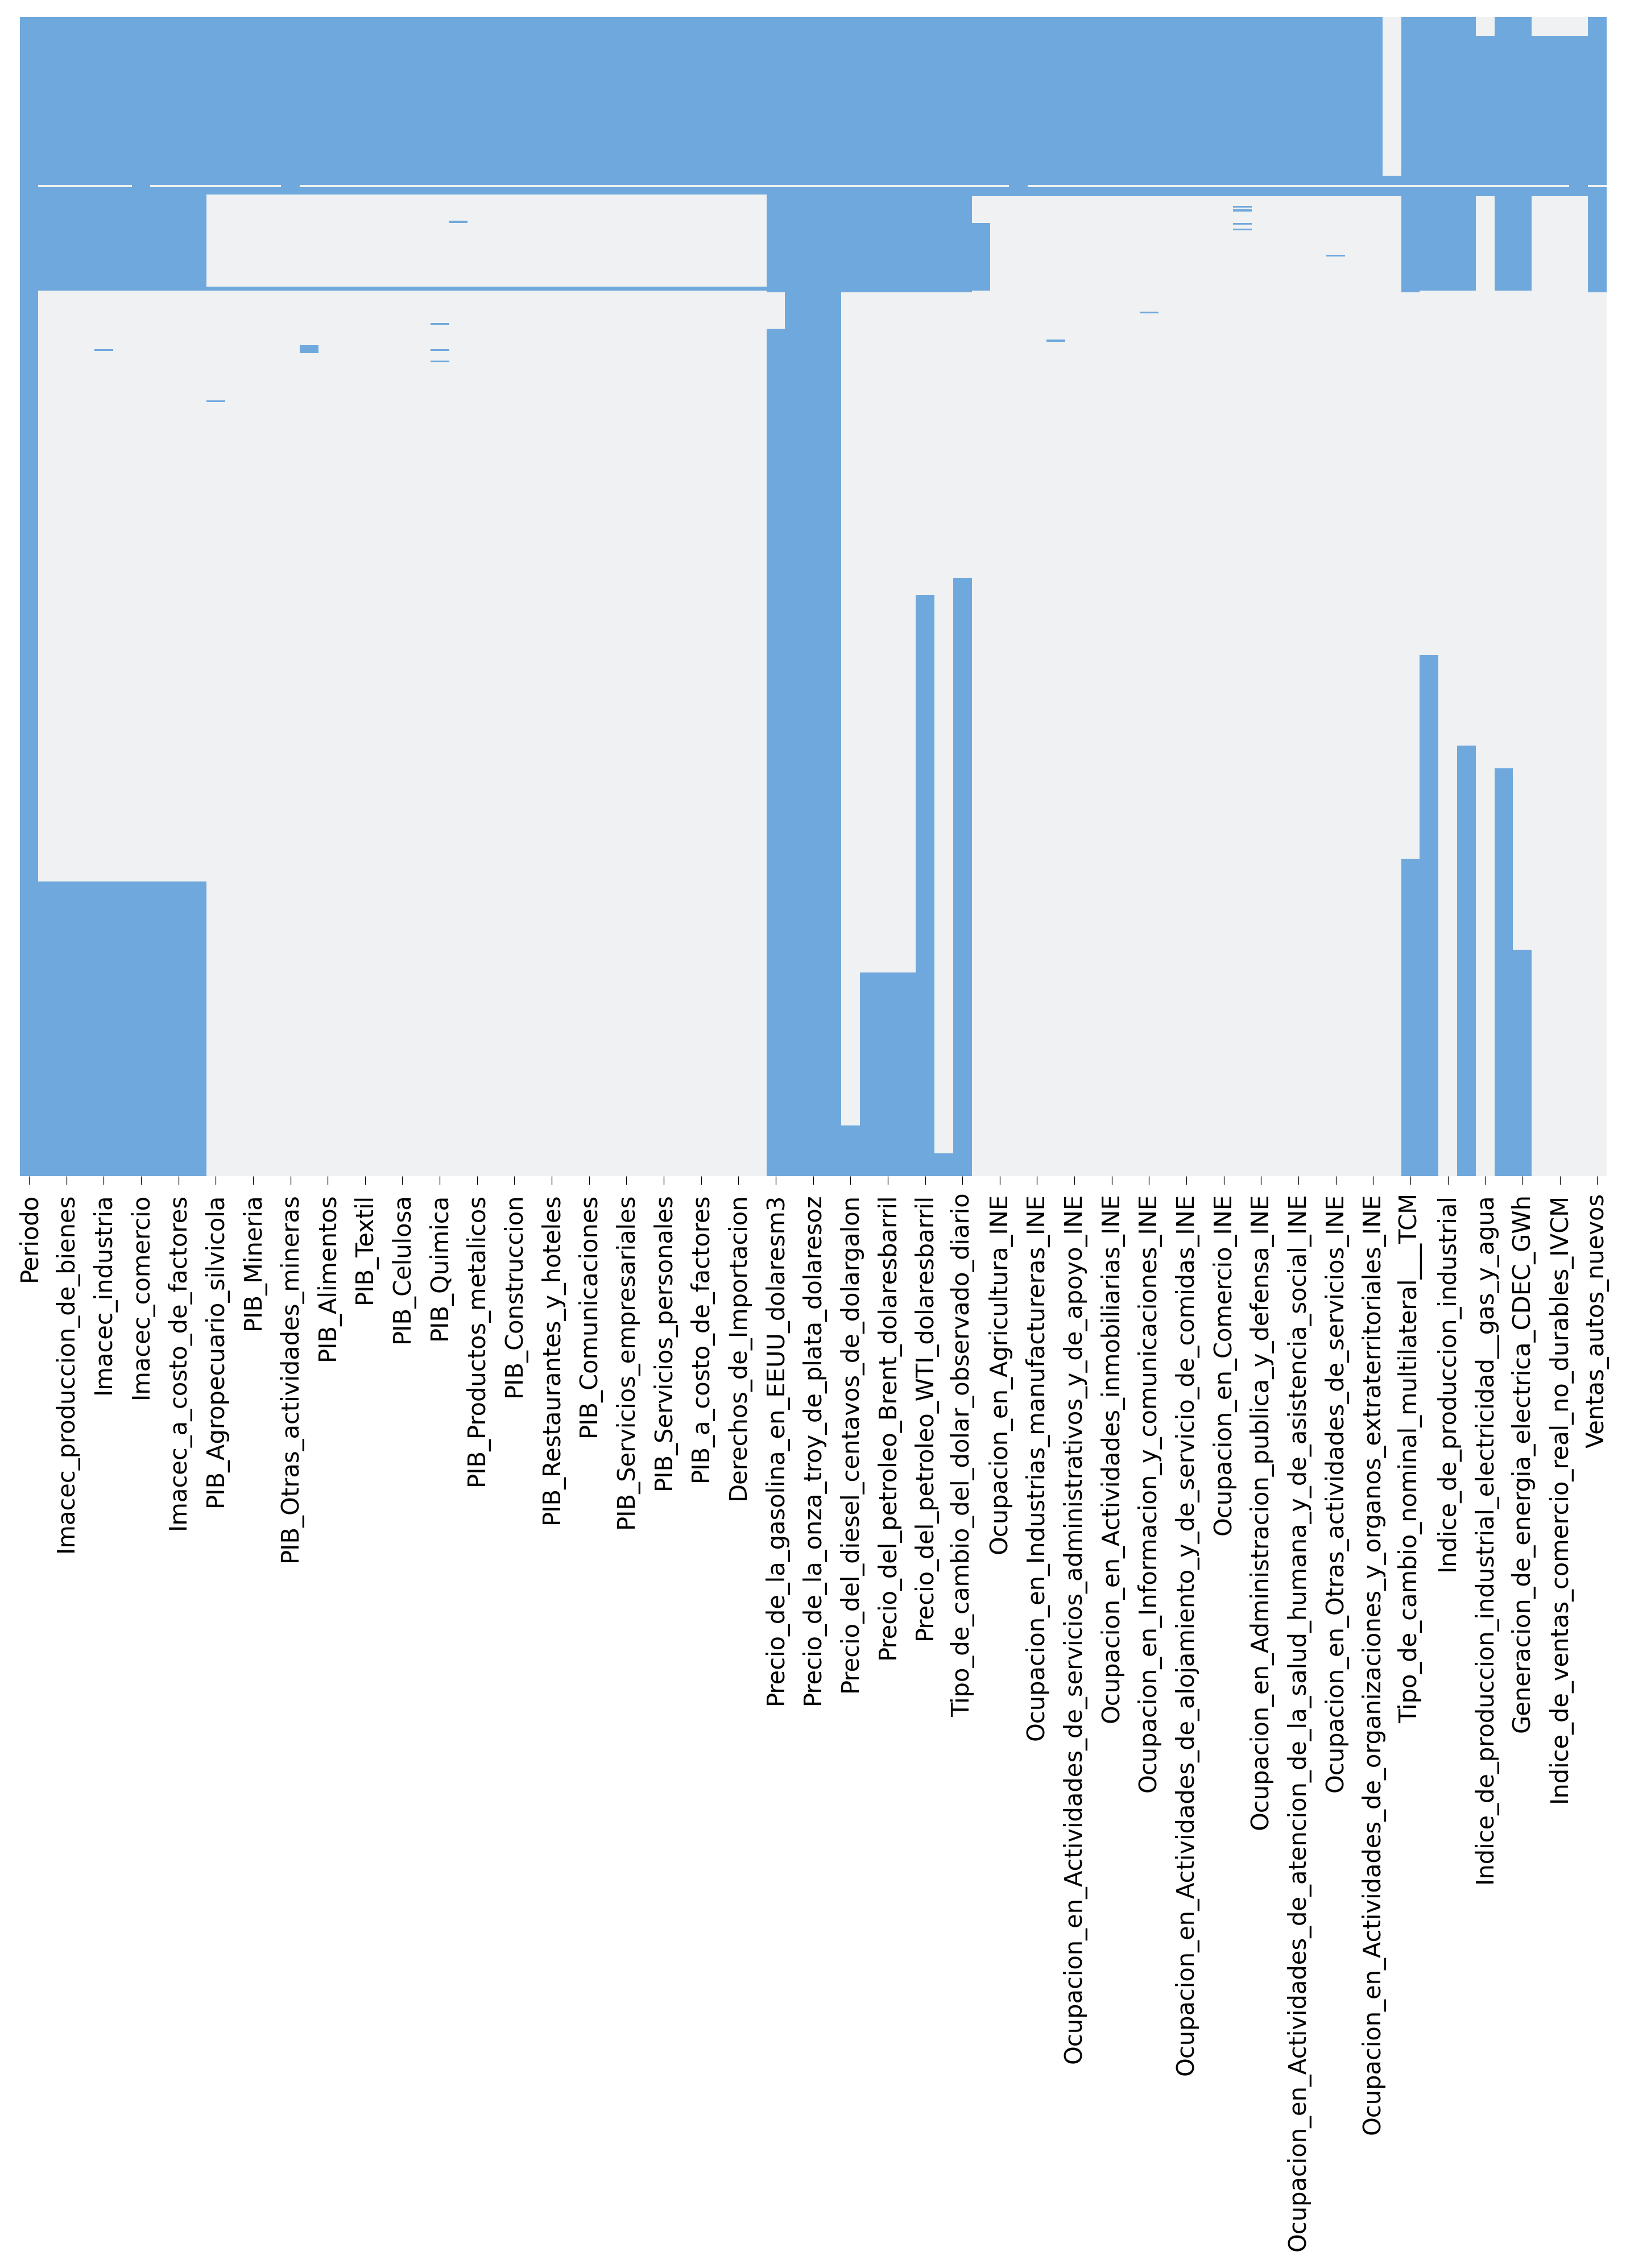

In [9]:
cm = sns.light_palette("#6fa8dcff", as_cmap=True, reverse=True)
plt.figure(figsize=(12,9))
sns.heatmap(bco_central.isnull(), yticklabels=False, cbar=False,cmap=cm)

In [10]:
bco_central.describe()

,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Ventas_autos_nuevos
count,613.000000,613.000000,172.000000,253.000000,253.000000,453.000000,157.000000,145.000000
mean,578.706574,54.202123,215.337558,5.055426,63.673202,43.066137,88.528822,26694.082759
std,468.018646,89.493857,68.625224,8.580500,29.704824,28.014437,36.772454,7170.231956
min,34.940000,1.320000,79.490000,1.612800,18.600000,11.300000,29.233000,4658.000000
25%,292.540000,4.760000,162.447500,2.863800,39.930000,20.100000,54.888000,23701.000000
50%,385.040000,6.080000,200.340000,3.885100,59.370000,30.390000,88.043000,27912.000000
75%,828.800000,35.080000,286.392500,5.930000,79.270000,59.800000,110.738000,31800.000000
max,1969.780000,431.028000,384.380000,136.338000,133.900000,133.930000,187.875000,39263.000000


- La columna periodo es una fecha y está como string
- La mayoría de los datos vienen como string, a pesar de ser numéricos
- Solo 8 columnas son float64
- Alta cantidad de nulos

Por lo tanto, antes de partir el desafío voy a transformar los datos str a numérico para poder explorarlos.

In [11]:
# bco_central['Periodo'] = pd.to_datetime(bco_central['Periodo'],format='%Y-%d-%m %H:%M:%S UTC')#2013-03-01 00:00:00 UTC
bco_central = bco_central.set_index('Periodo')

- Además hay columnas numéricas que toman valores iguales a la letra 'a', por lo tanto al utilizar pd.to_numeric, aprovecho de reemplazar las a por vacío:

In [12]:
cols = [c for c in bco_central.columns.tolist() if c not in bco_central.describe().columns.tolist()]
for c in cols:
    bco_central[c] = pd.to_numeric(bco_central[c].str.replace('.','').replace('a',''))
bco_central

/var/folders/yw/wzcp4tyj0xx8d99prn3n8_h80000gn/T/ipykernel_7592/2792506400.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bco_central[c] = pd.to_numeric(bco_central[c].str.replace('.','').replace('a',''))


,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
Periodo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00 UTC,102796218.0,10546824.0,978554365.0,102297537.0,114994919.0,110729395.0,100064328.0,103163651.0,103405852.0,579846819.0,570624122.0,123491343.0,110356254.0,131350889.0,130648285.0,367818436.0,162692807.0,330305467.0,643366109.0,974948182.0,103469519.0,184460073.0,807709837.0,212409058.0,301314934.0,710242818.0,115489064.0,202838669.0,546694889.0,337915263.0,5691837.0,11393886.0,793471519.0,140103913.0,512994015.0,108482797.0,896688023.0,659936009.0,118109613.0,7638022.0,1593.60,288.1570,347586864.0,301.11,3.8117,109.24,76520246.0,92.91,89.171,472484.0,799068585.0,798092771.0,258428756.0,901504814.0,360108494.0,18951548.0,229653619.0,547033124.0,19153327.0,155736824.0,498854717.0,341857582.0,682423108.0,151916628.0,349444258.0,445435266.0,587837412.0,362517856.0,82567788.0,201875908.0,416124956.0,190085519.0,NaN,93621.0,865903468.0,102761705.0,98915705.0,NaN,108387837.0,580480672.0,NaN,NaN,NaN,28577.0
2013-04-01 00:00:00 UTC,101664842.0,999272757.0,927333293.0,104485589.0,102199311.0,106098291.0,102600107.0,101937319.0,102766884.0,37

#### Precipitación

In [13]:
pp_mm.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673


In [14]:
# for c in pp_mm.columns:
#     pp_mm[c].resample(rule='m').sum().plot(kind='bar')
#     plt.title(c)
#     plt.show()

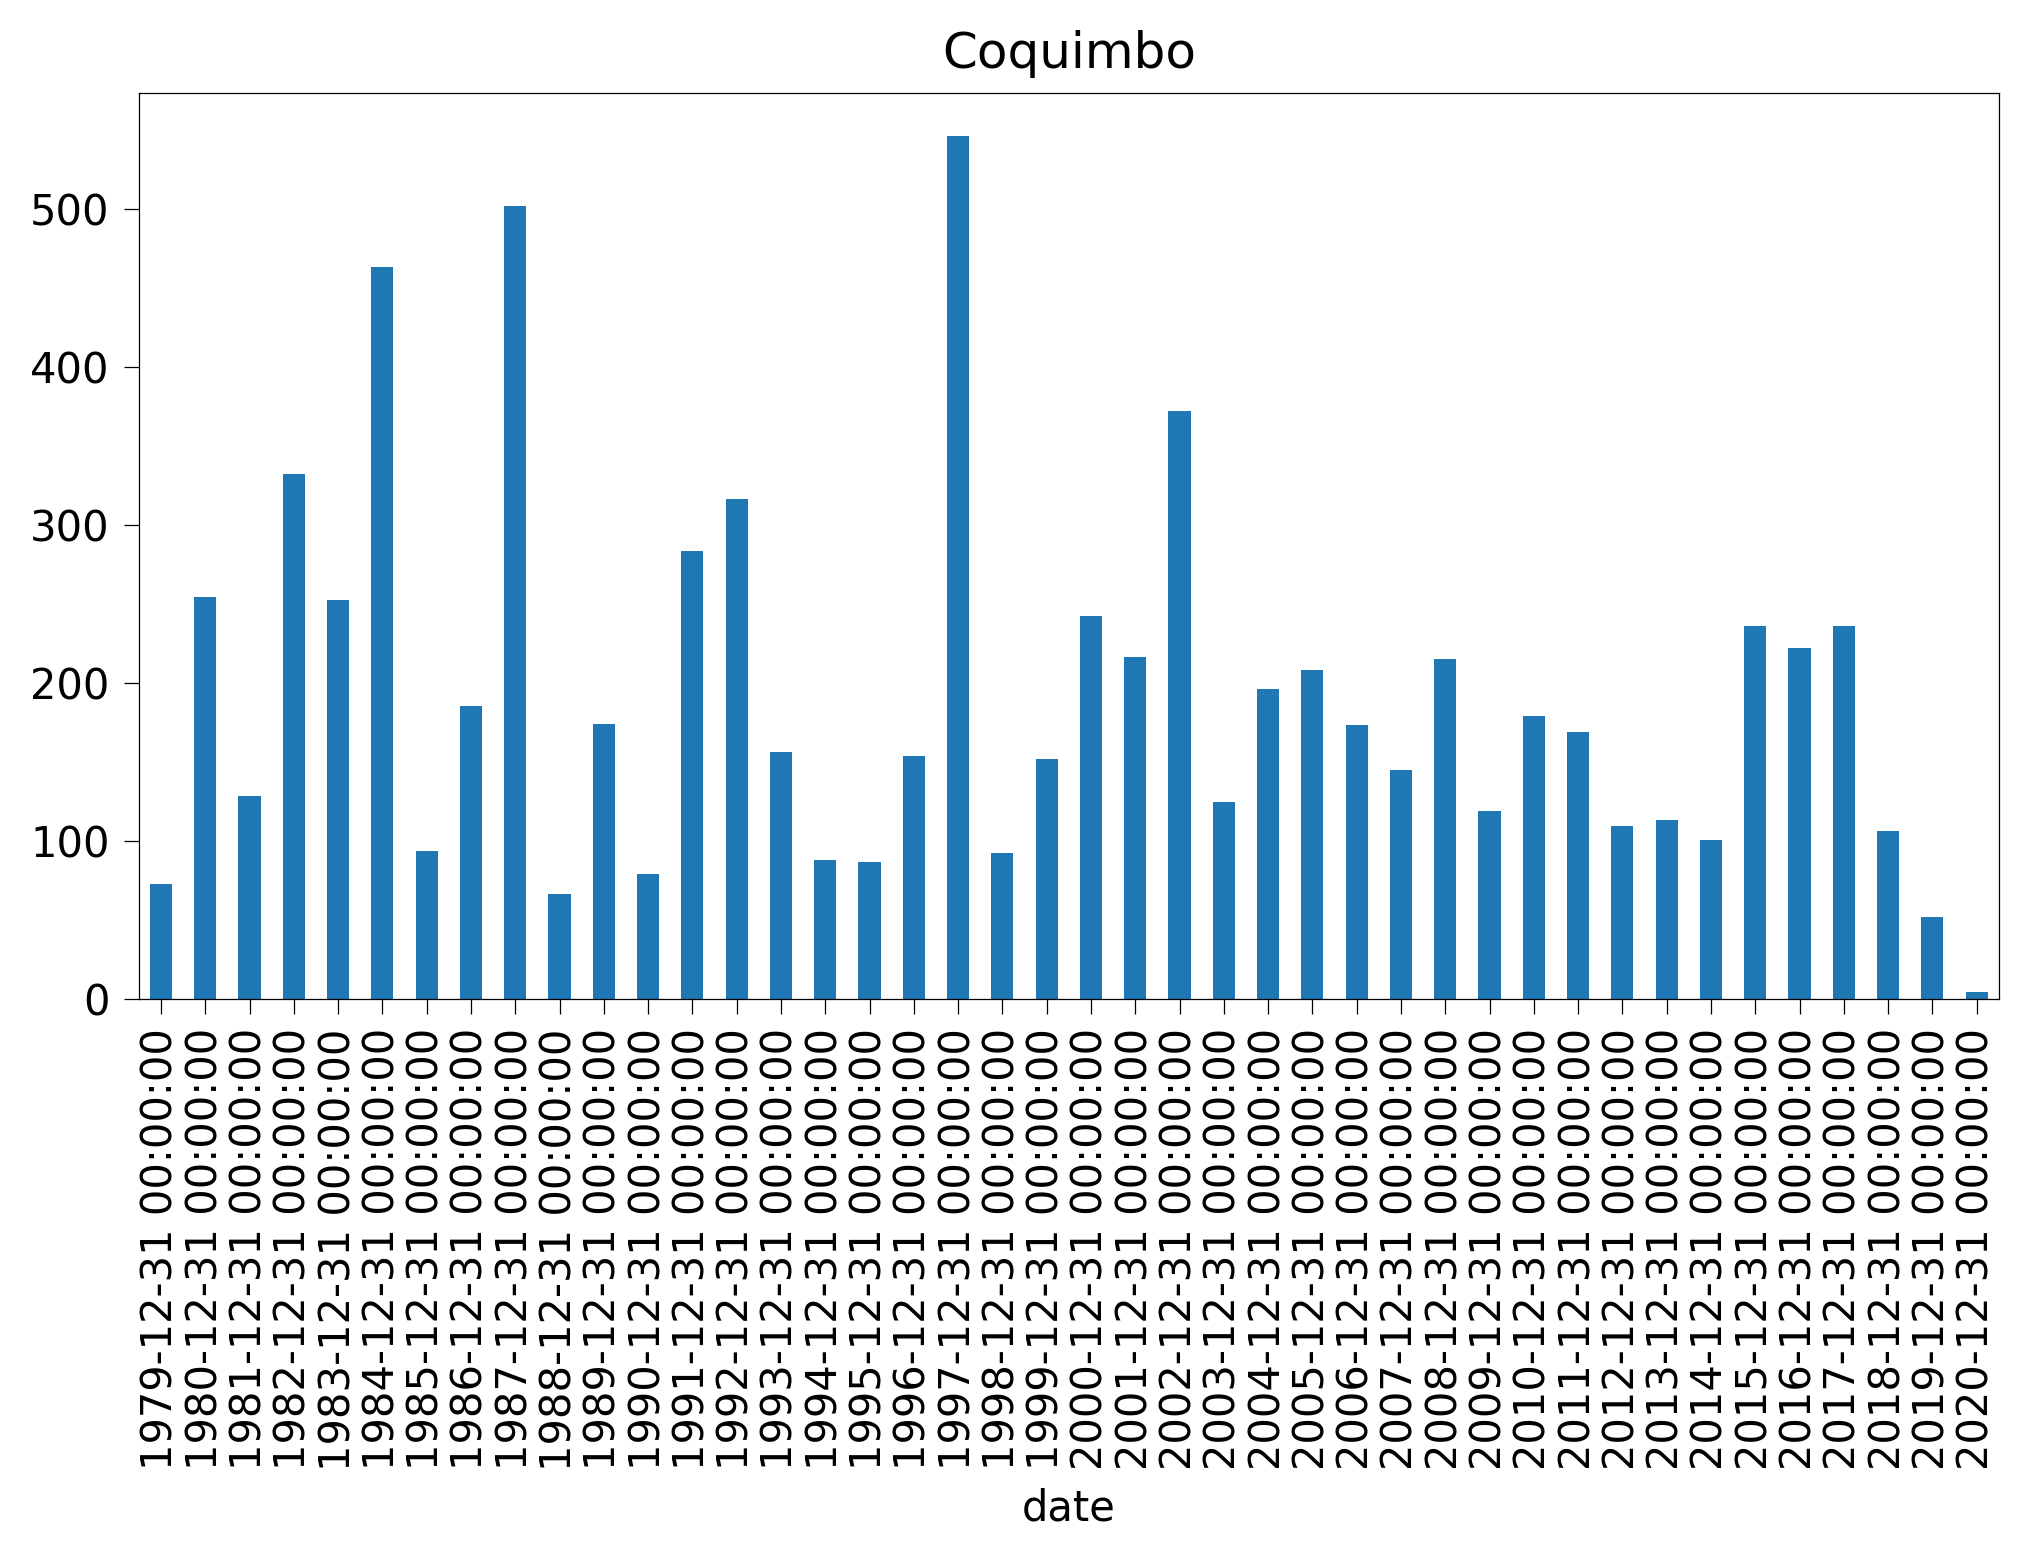

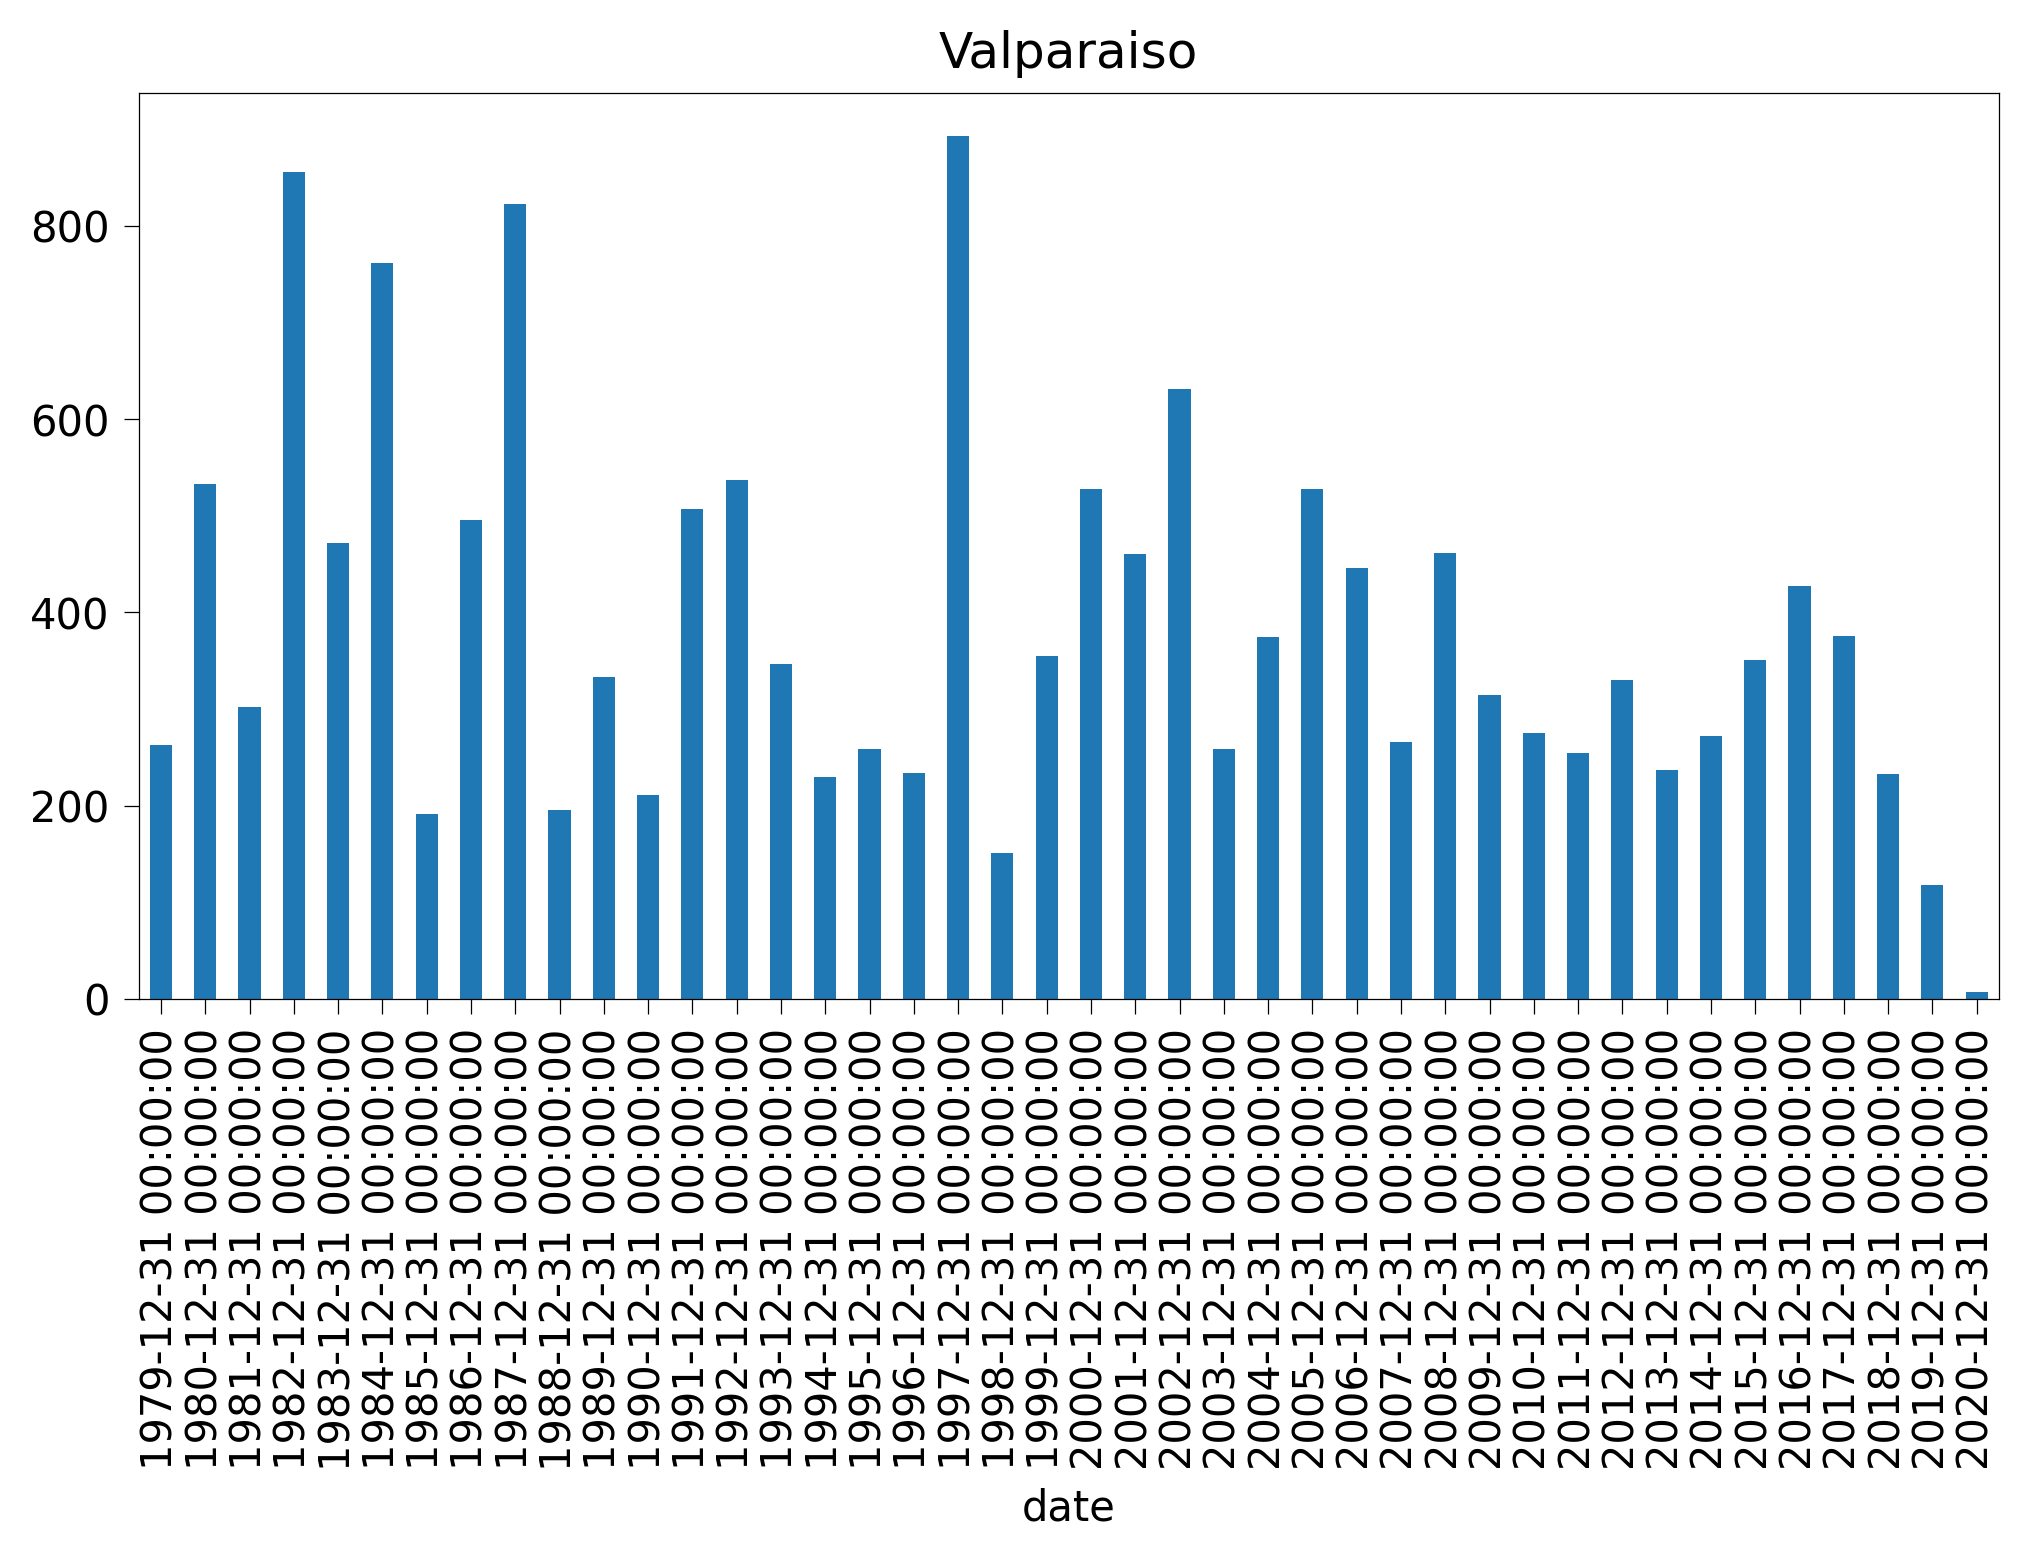

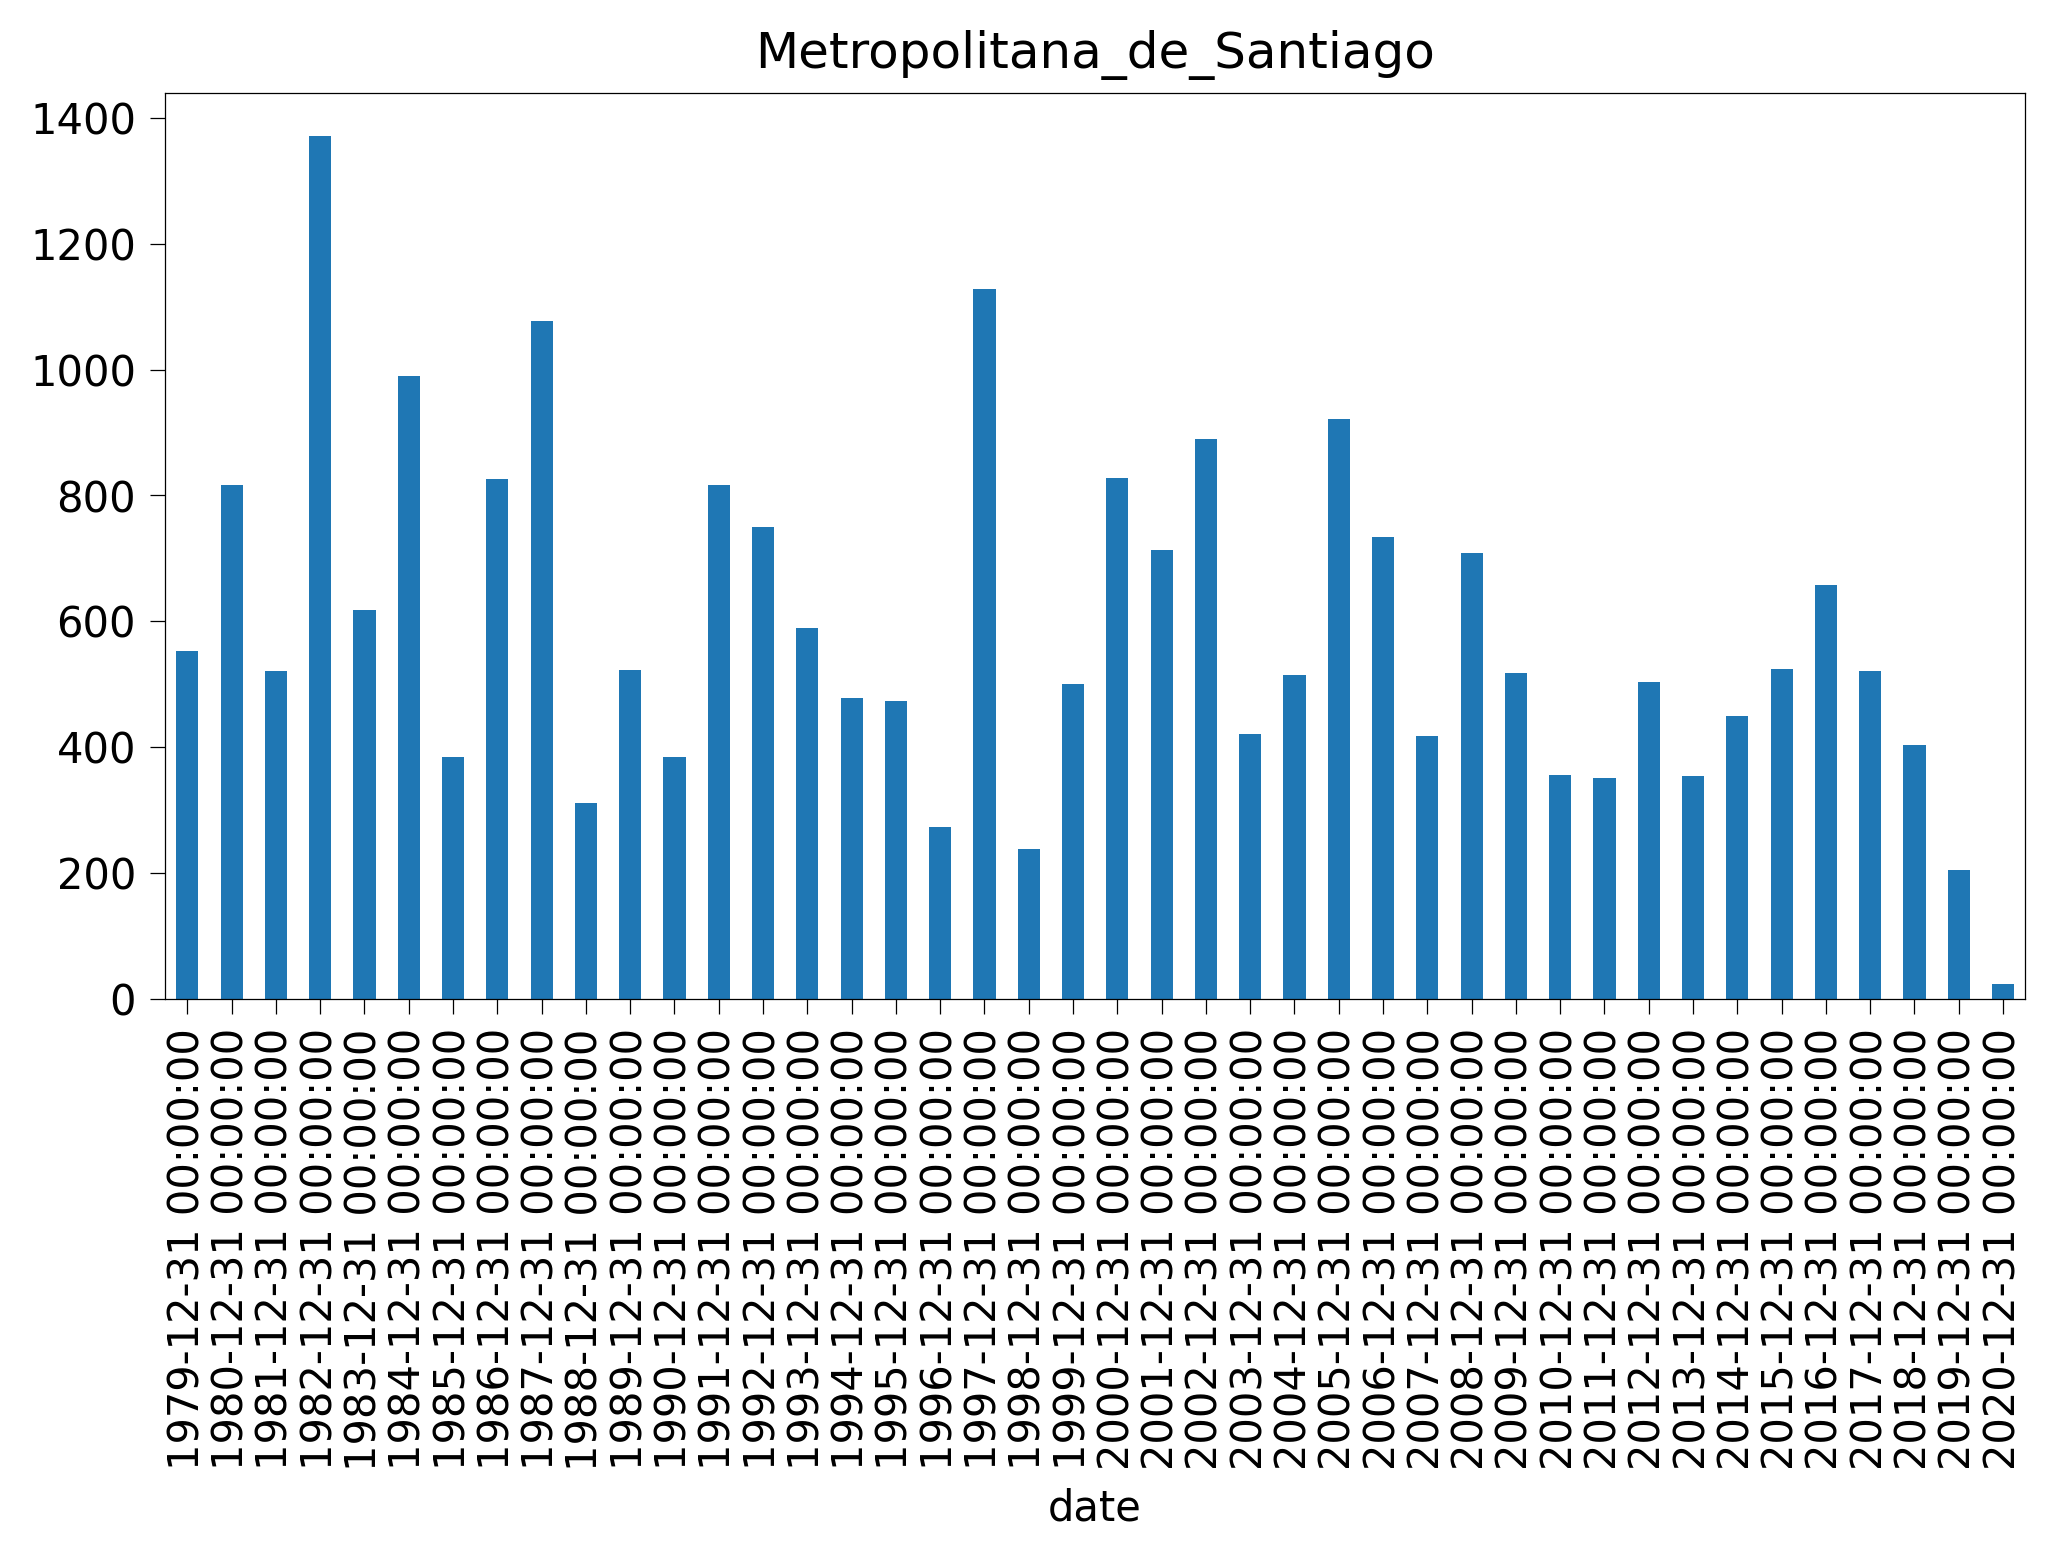

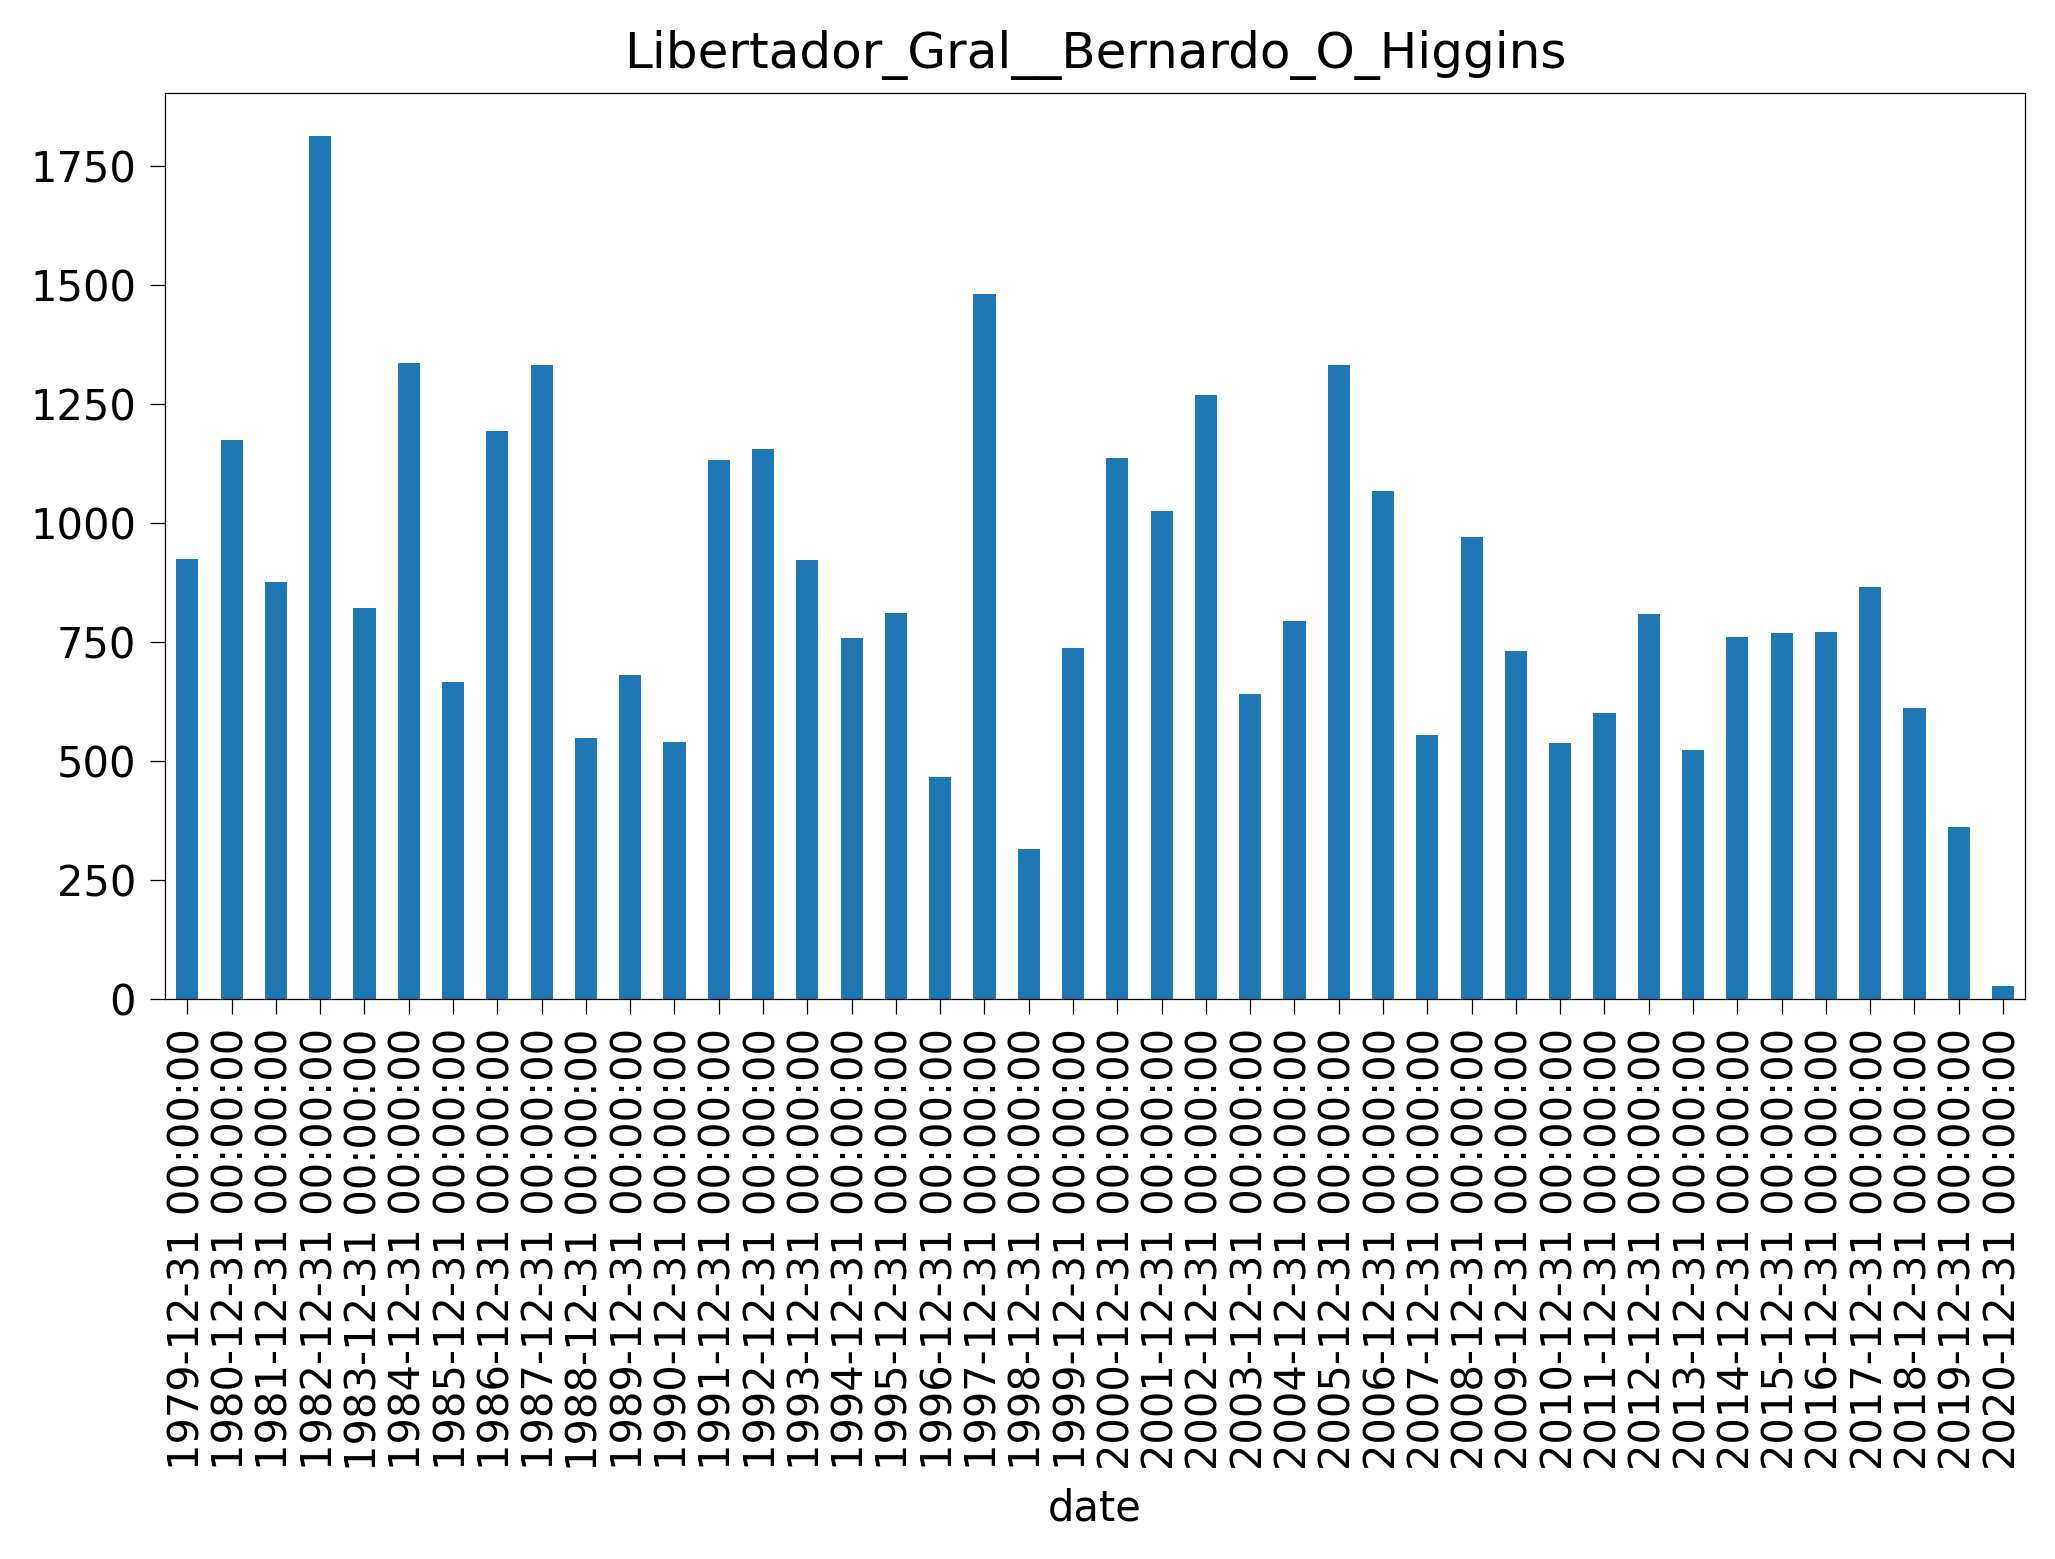

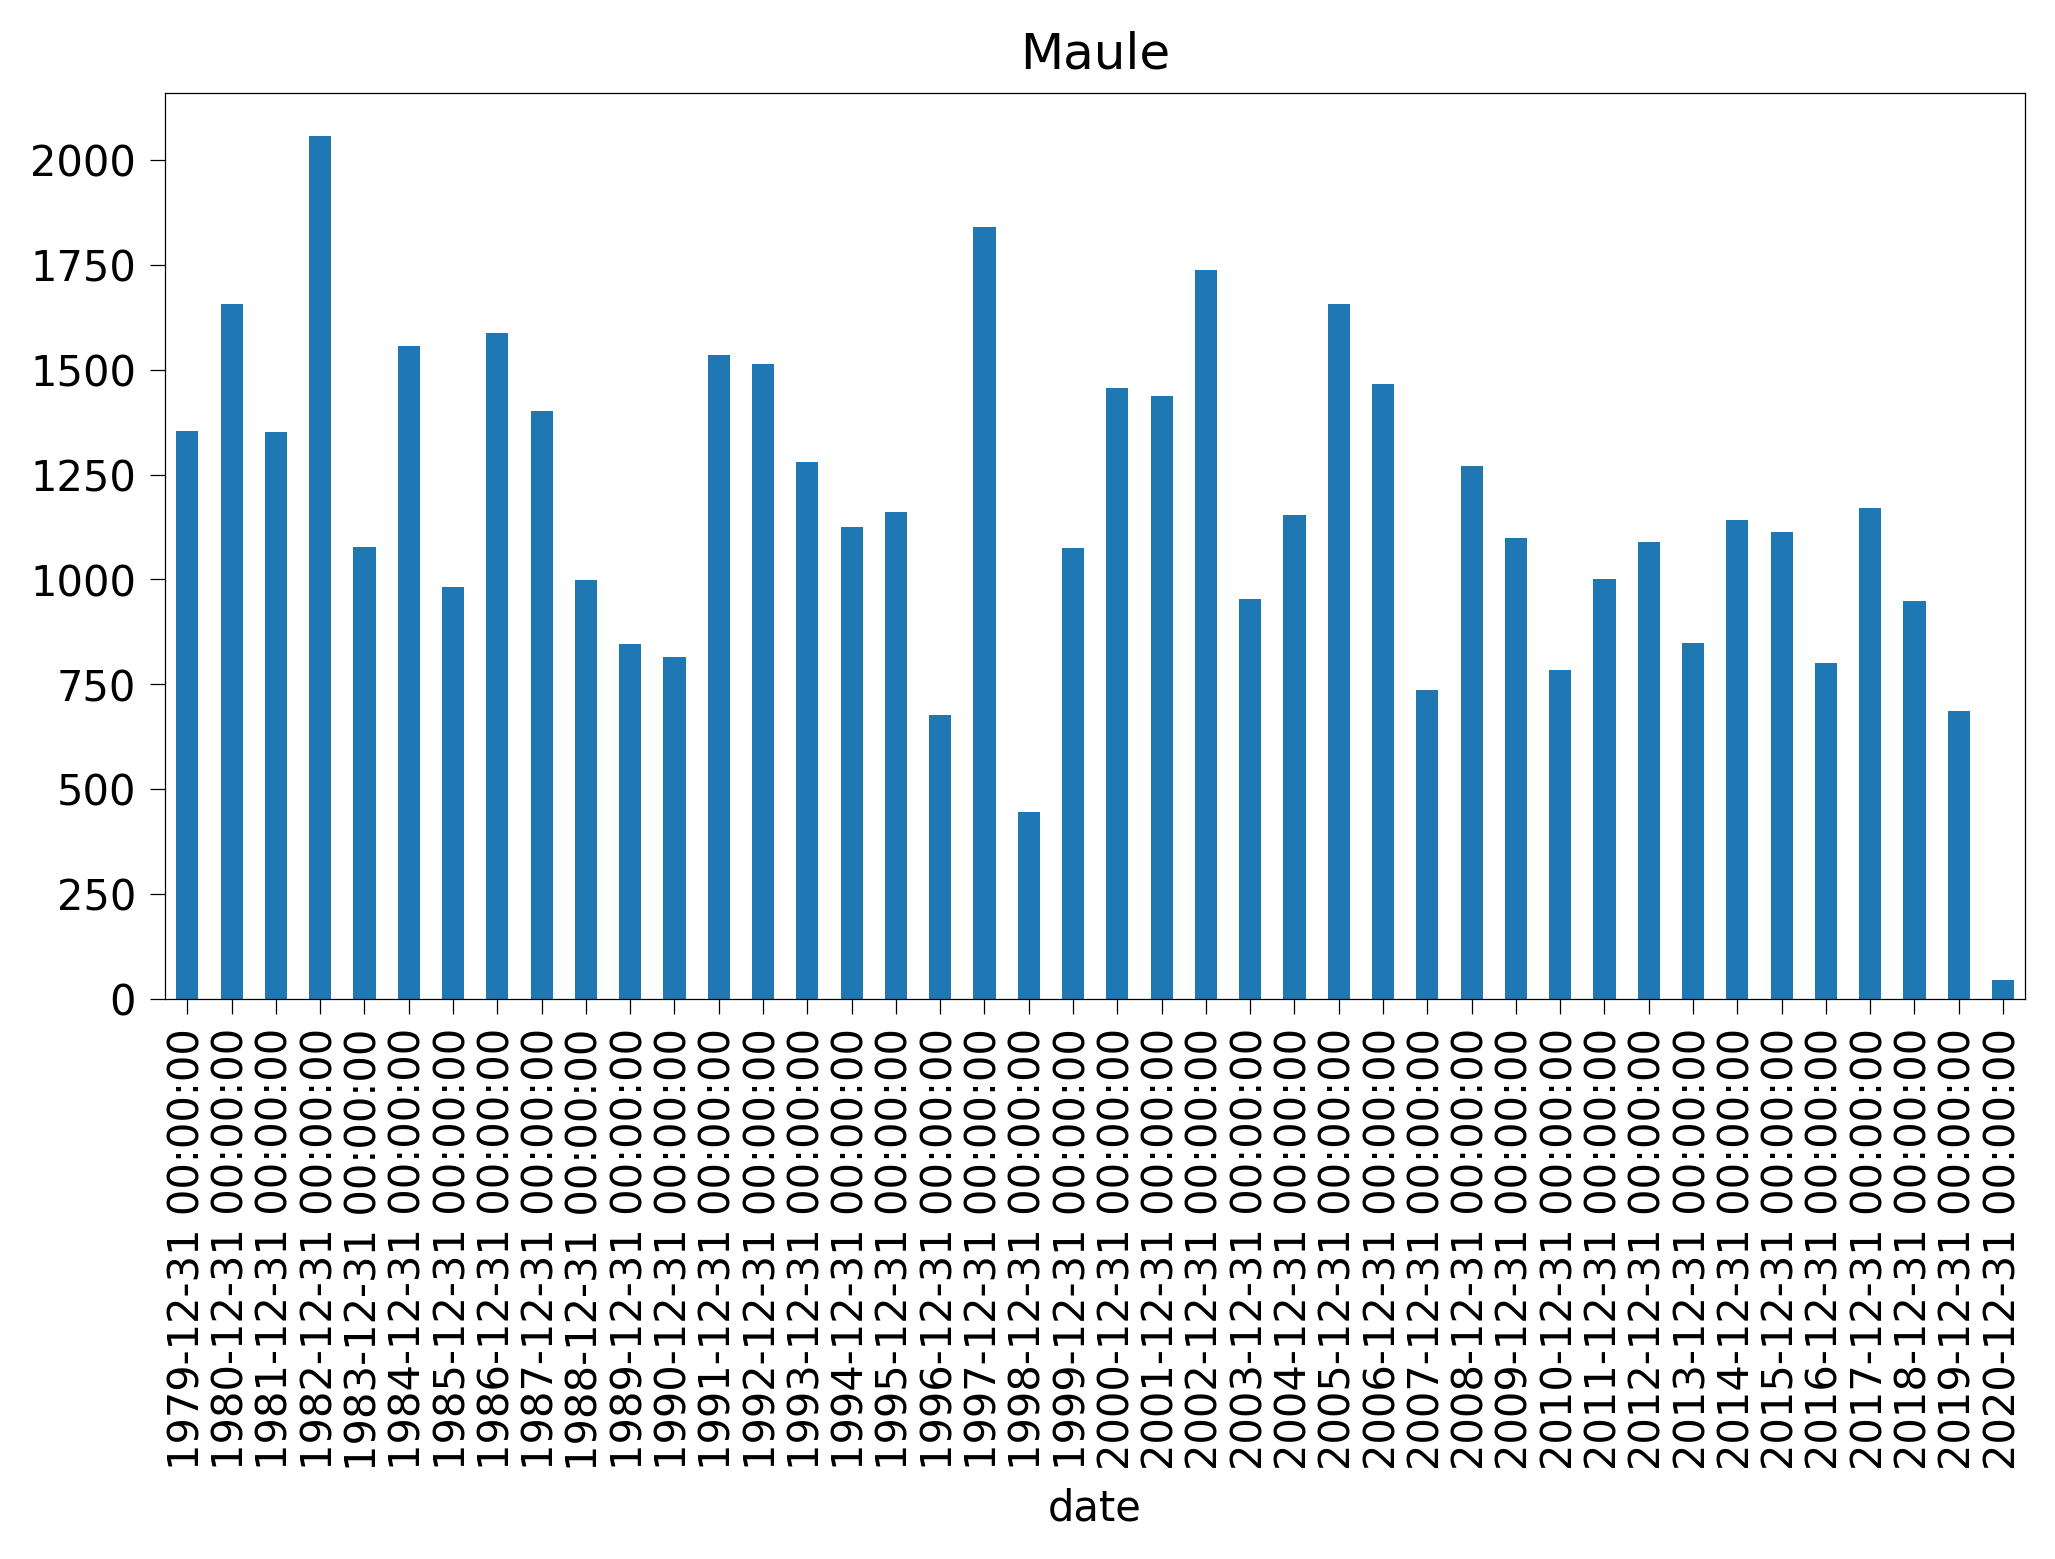

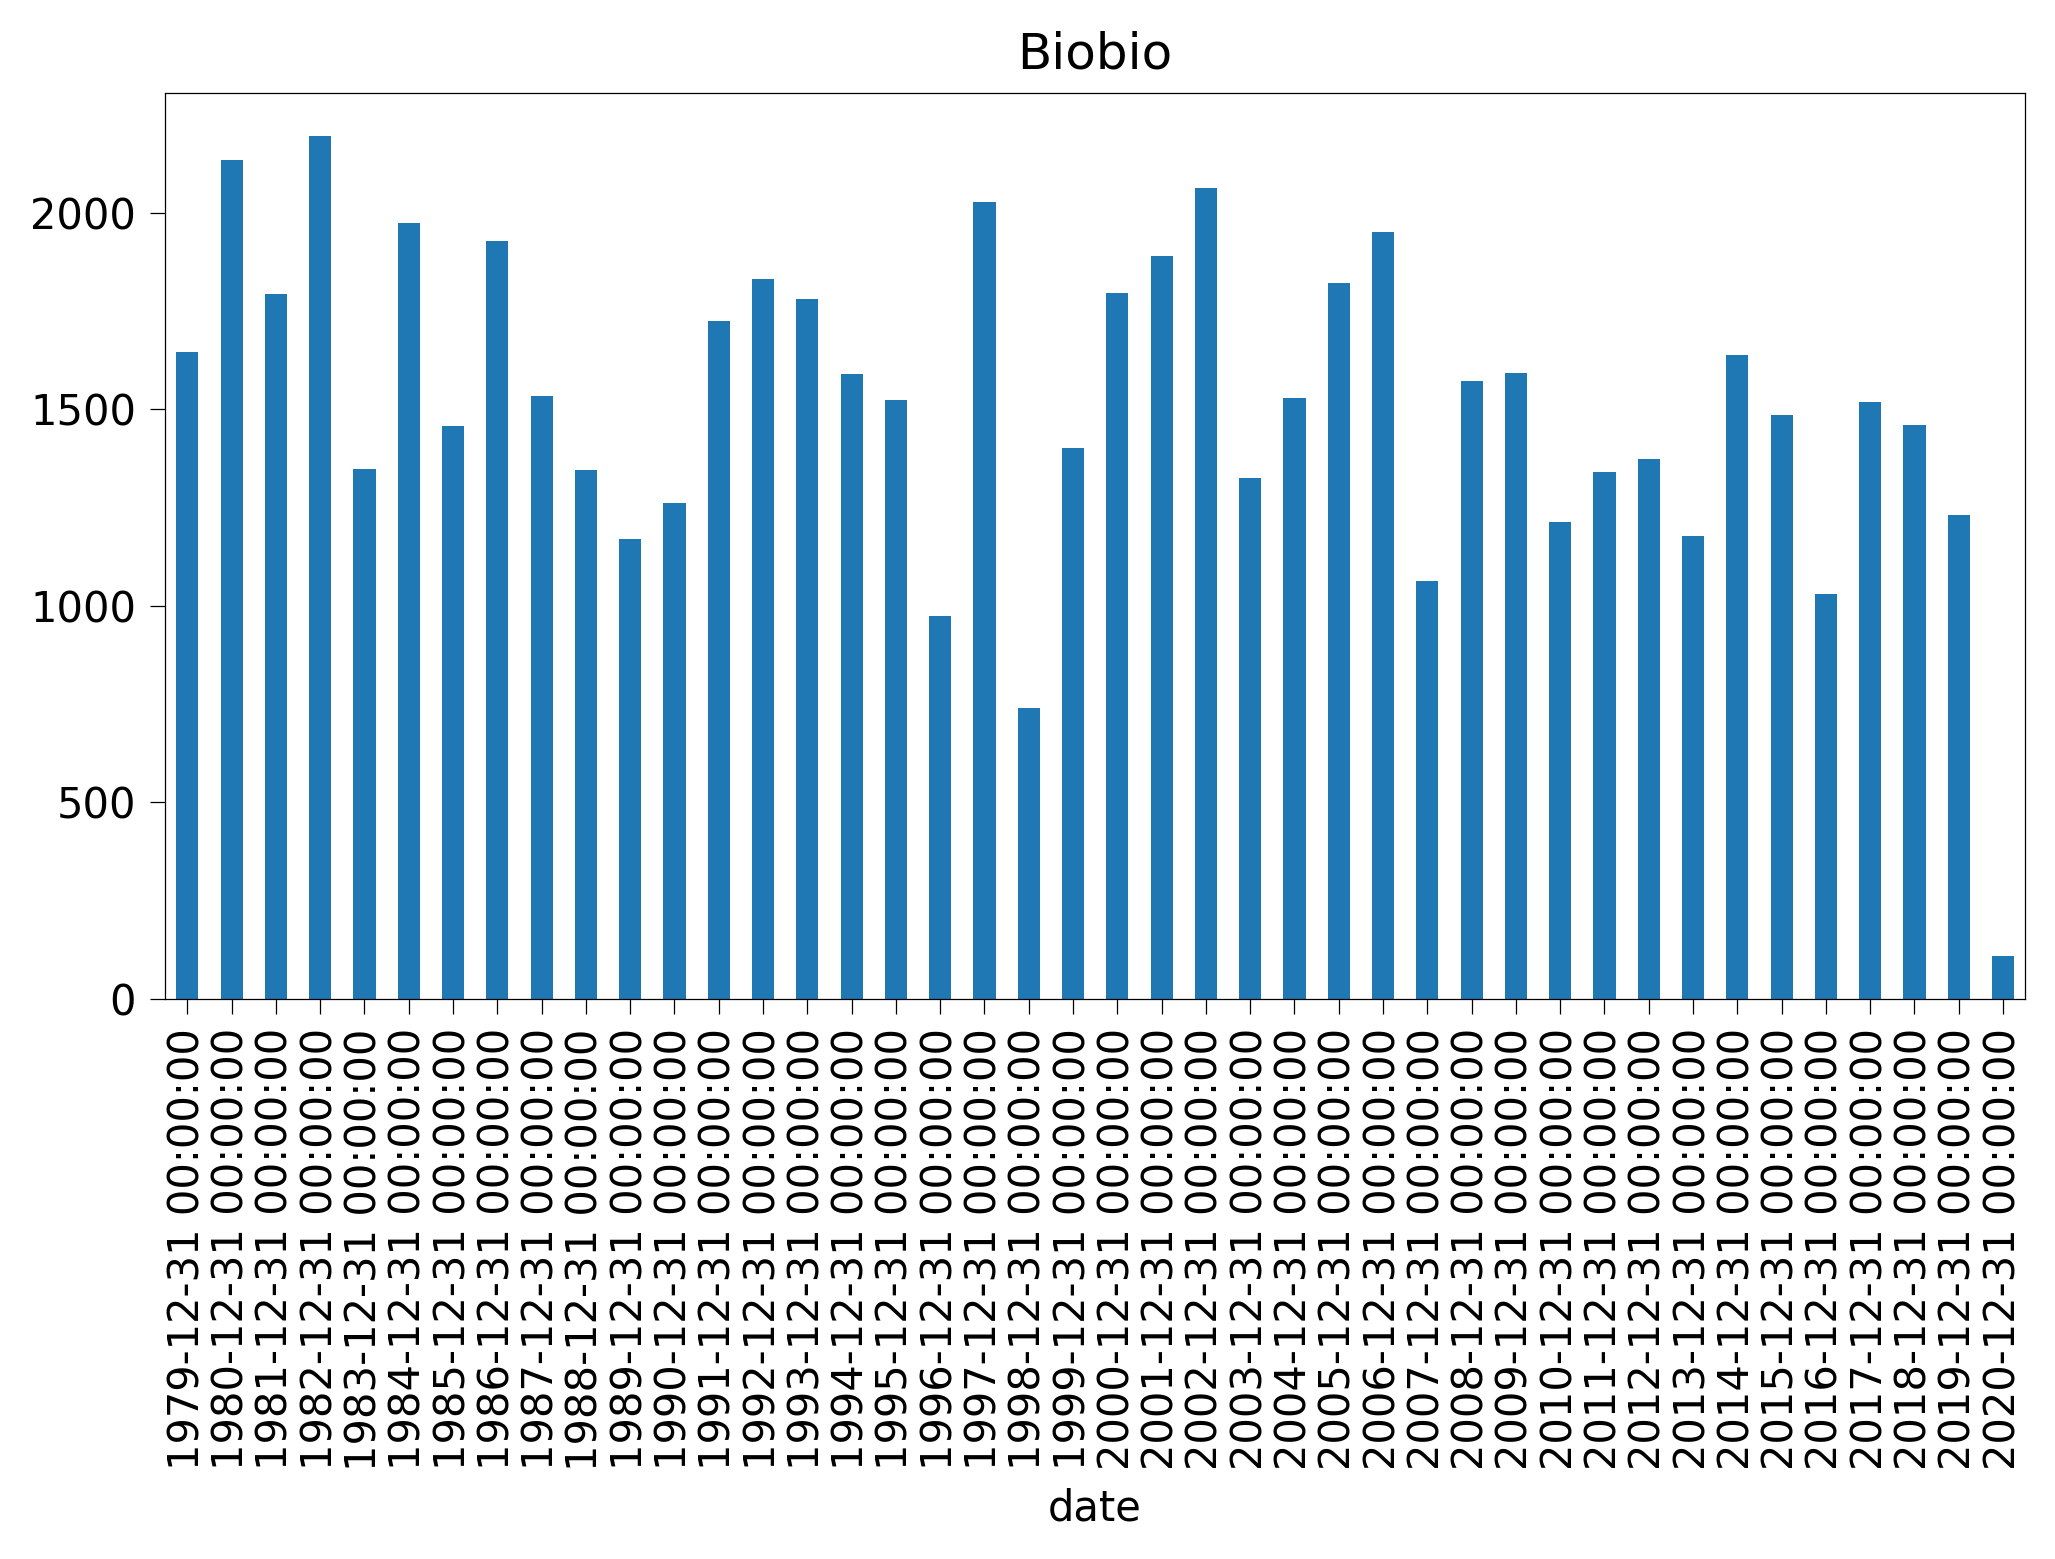

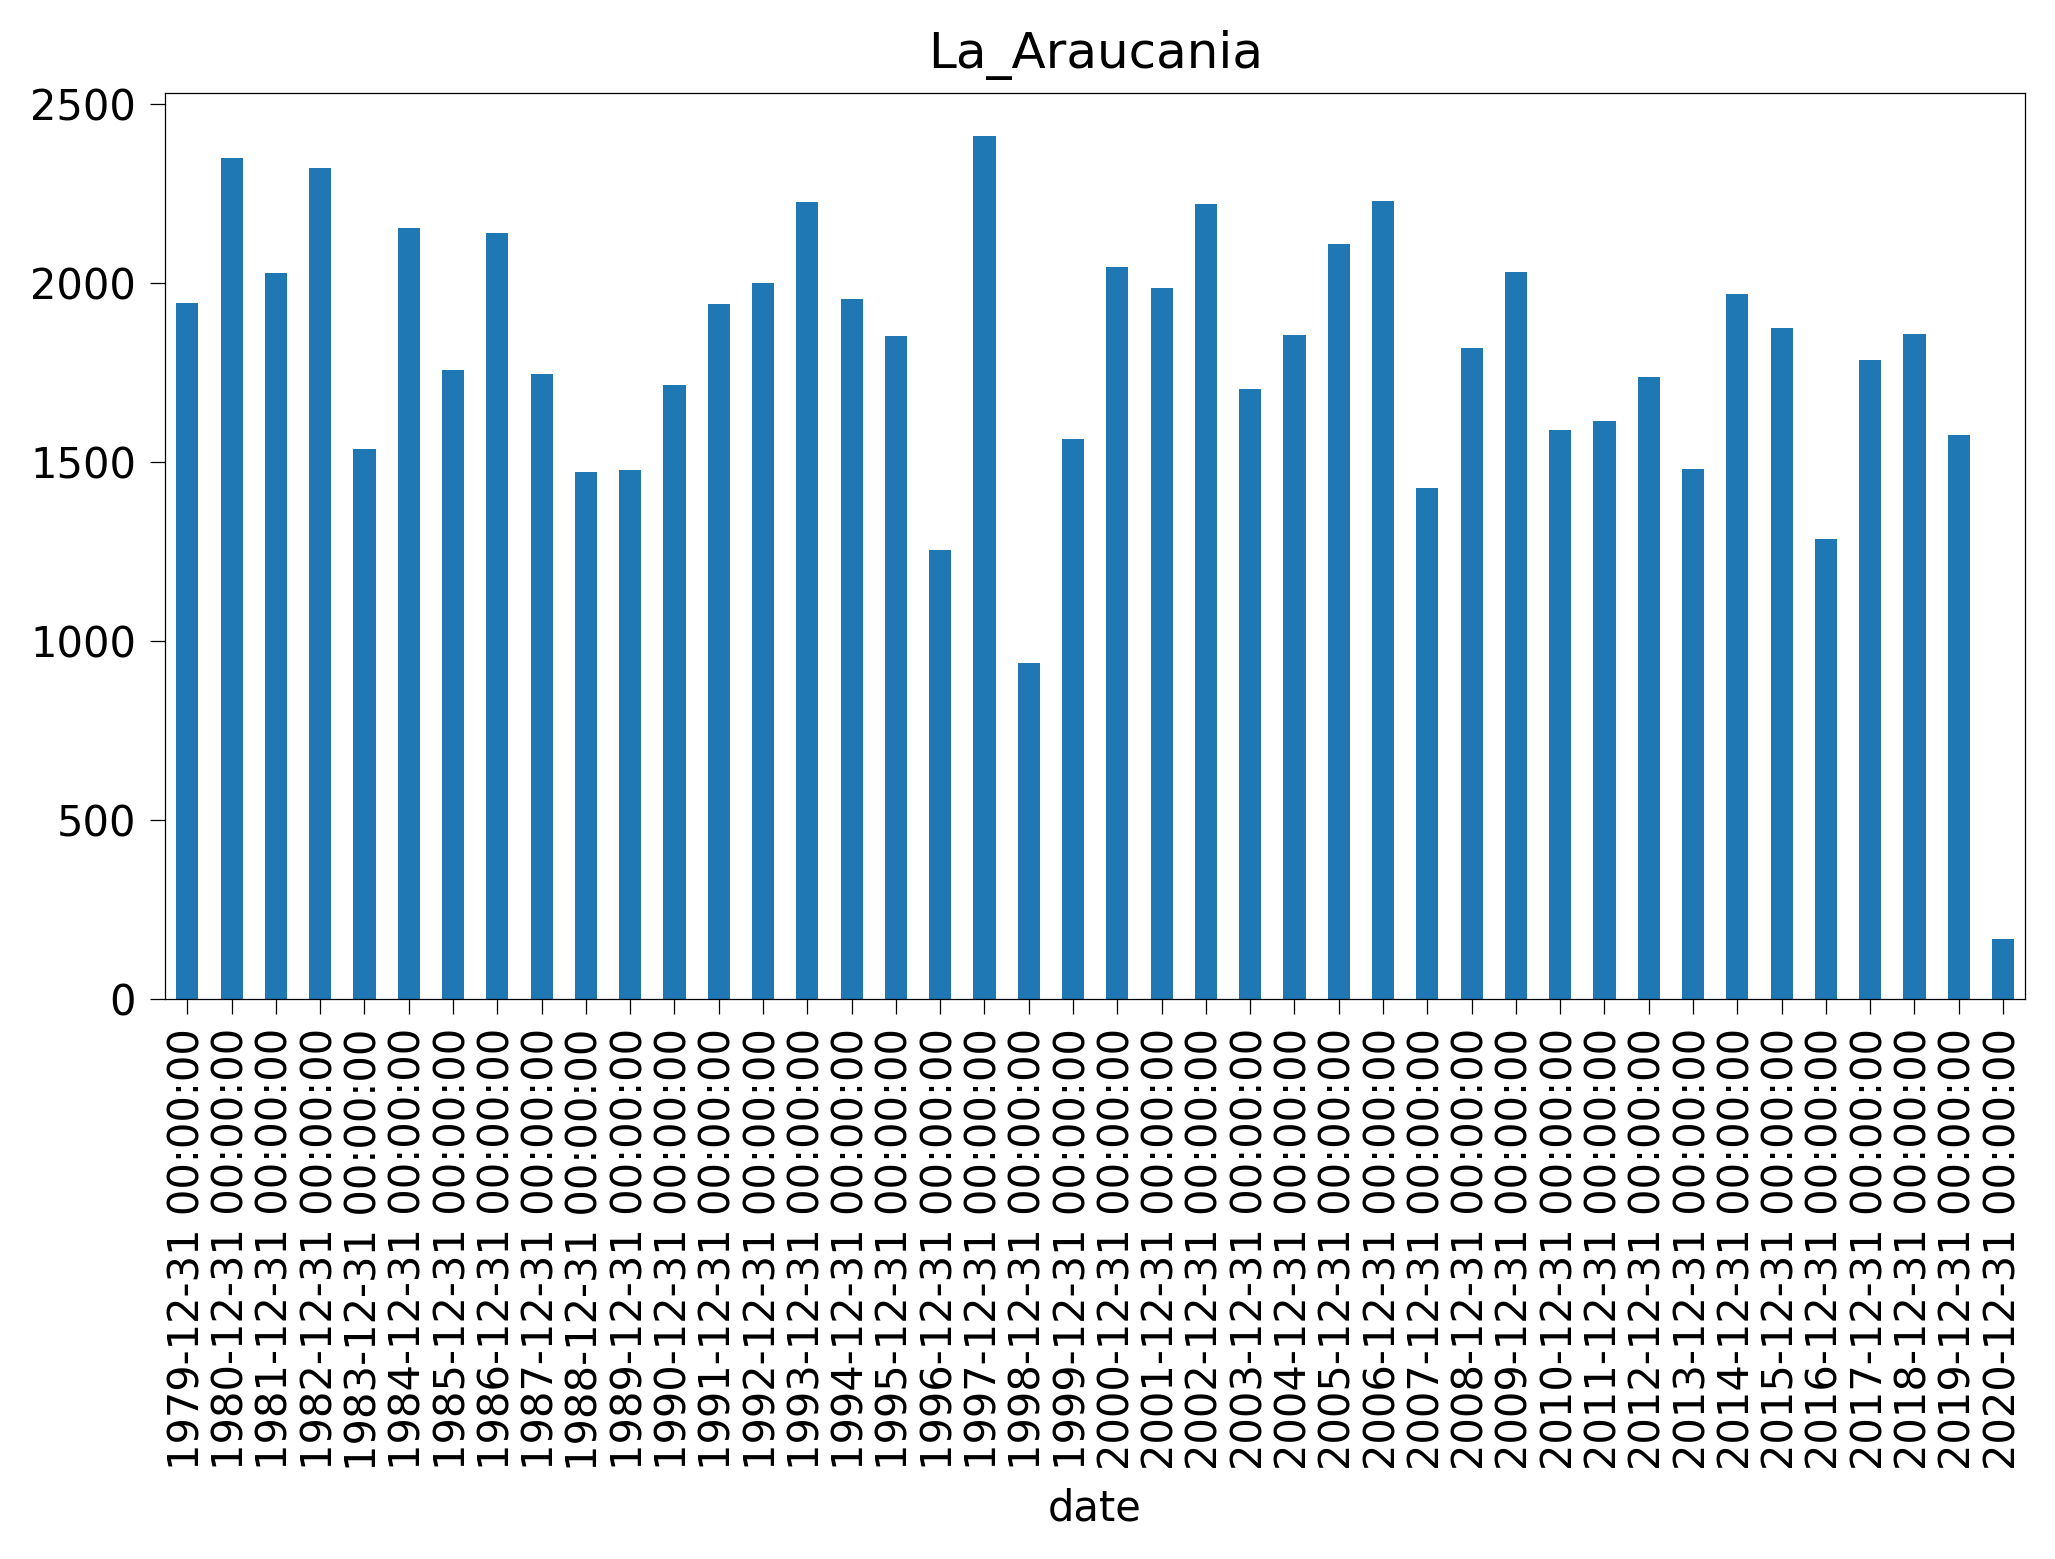

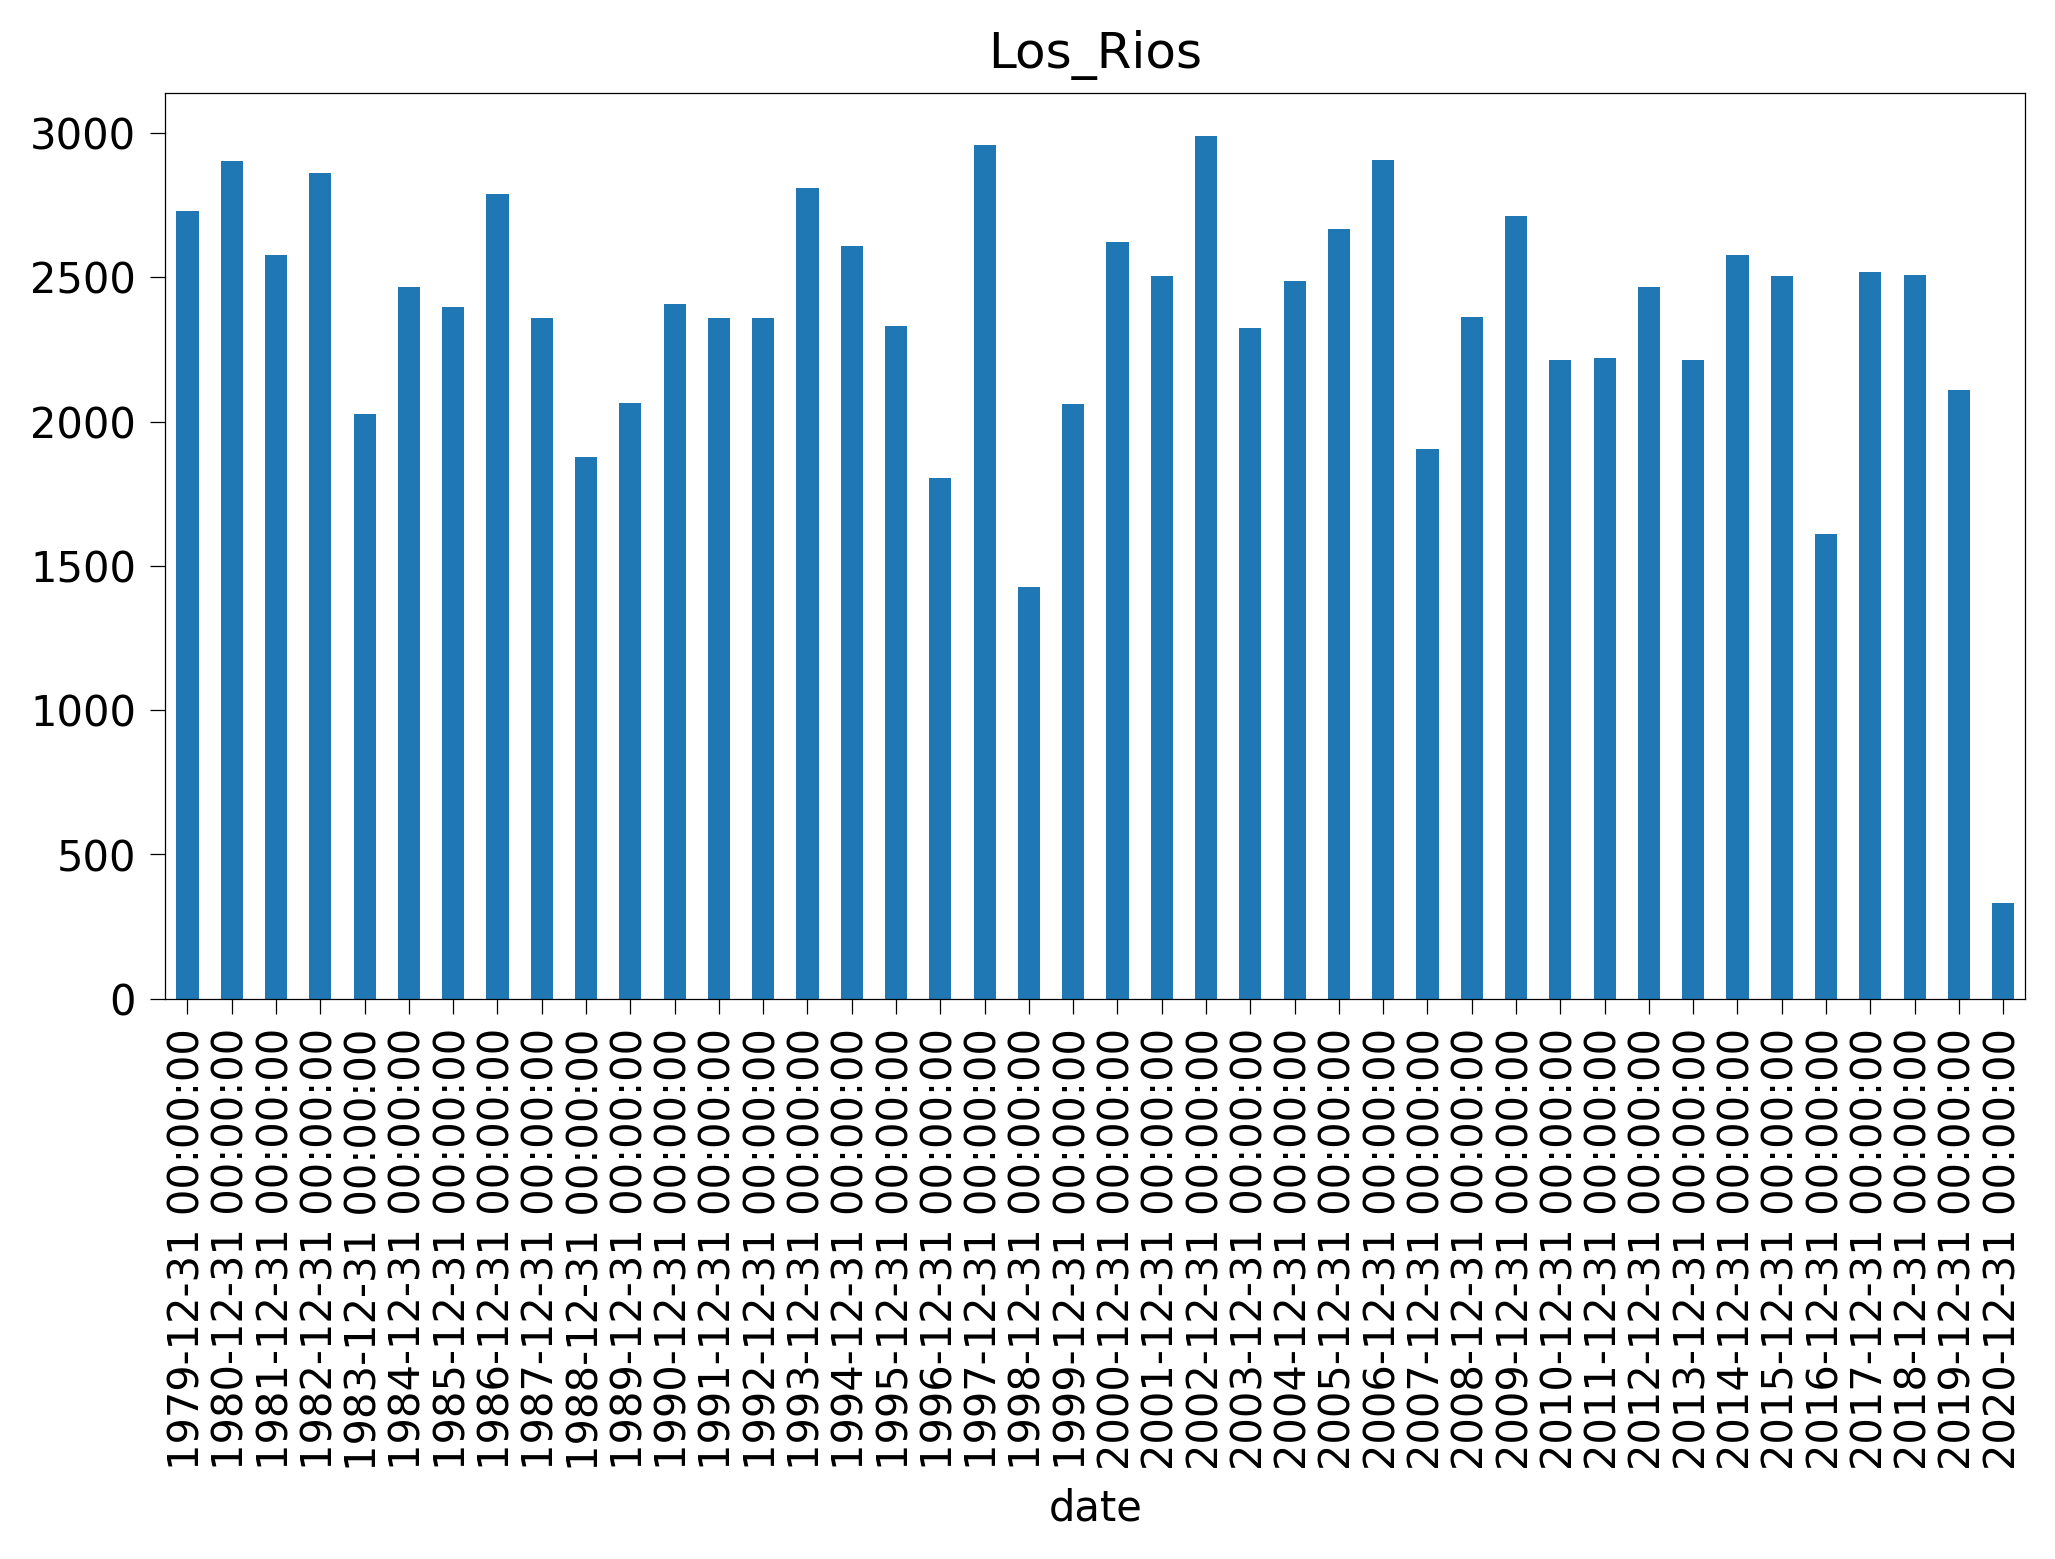

In [15]:
for c in pp_mm.columns:
    pp_mm[c].resample(rule='Y').sum().plot(kind='bar')
    plt.title(c)
    plt.show()

In [16]:
pp_mm.drop_duplicates(inplace=True)

#### Banco central

In [17]:
bco_central.describe()

,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
count,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.010000e+02,3.000000e+02,3.000000e+02,3.000000e+02,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.600000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,5.940000e+02,613.000000,613.000000,6.130000e+02,172.000000,253.000000,253.000000,2.530000e+02,453.000000,157.000000,4.620000e+02,1.300000e+02,9.400000e+01,9.500000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,1.000000e+01,3.130000e+02,4.200000e+02,1.440000e+02,3.720000e+02,8.400000e+01,3.600000e+02,2.640000e+02,8.400000e+01,8.400000e+01,8.500000e+01,145.000000
mean,5.046252e+08,6.126781e+08,6.427296e+08,6.118681e+08,5.586226e+08,4.607443e+0

In [18]:
bco_central.drop_duplicates(inplace=True)

## 3. Visualización

### 3a. Función para graficar series históricas de precipitación

In [19]:
def plot_pp(df, region, min_date, max_date):
    if region not in df.columns:
        print('Por favor, indica una región que exista en el dataset')
    else:
        ax = df[region].plot()
        ax.set_xlim(pd.Timestamp(min_date), pd.Timestamp(max_date))
        plt.show()

### 3b. Estacionalidad y tendencia

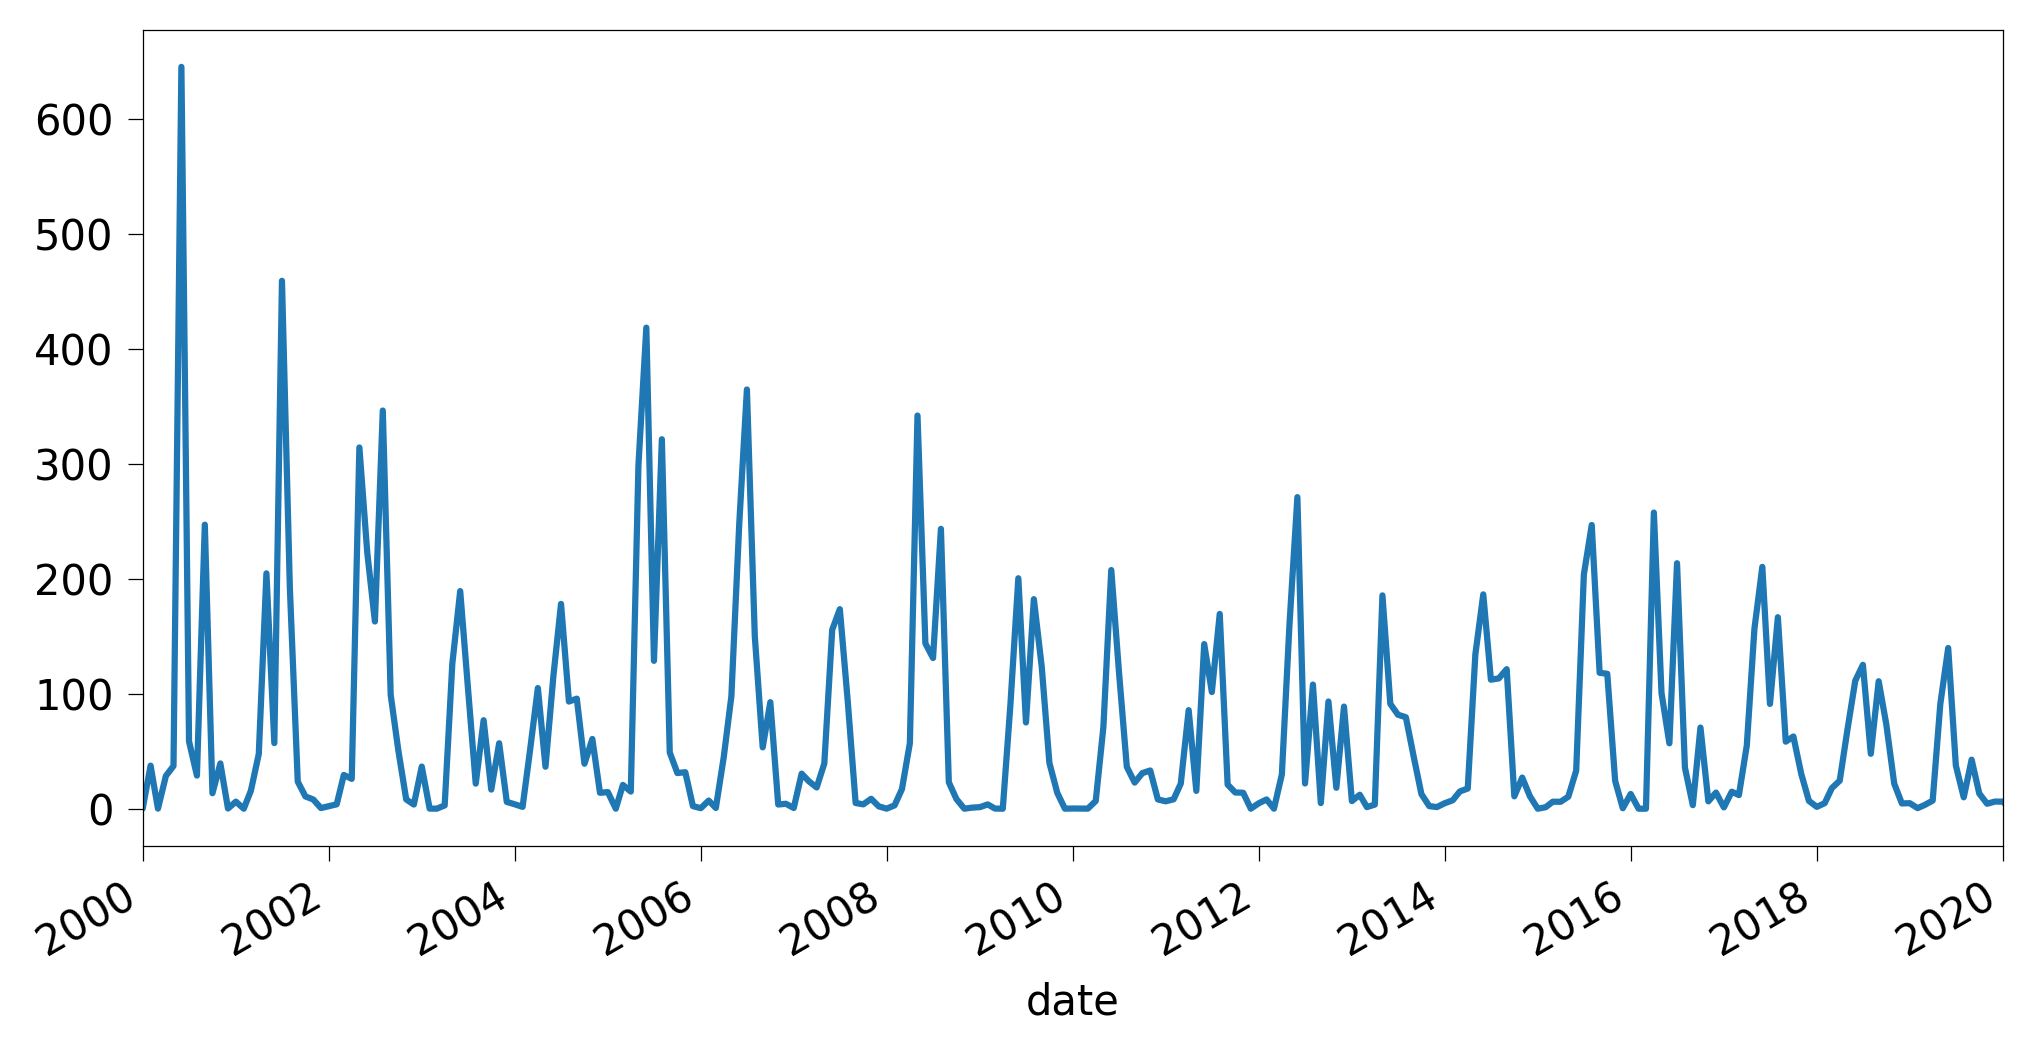

In [20]:
plot_pp(pp_mm, 'Libertador_Gral__Bernardo_O_Higgins', '2000-01-01','2020-01-01')

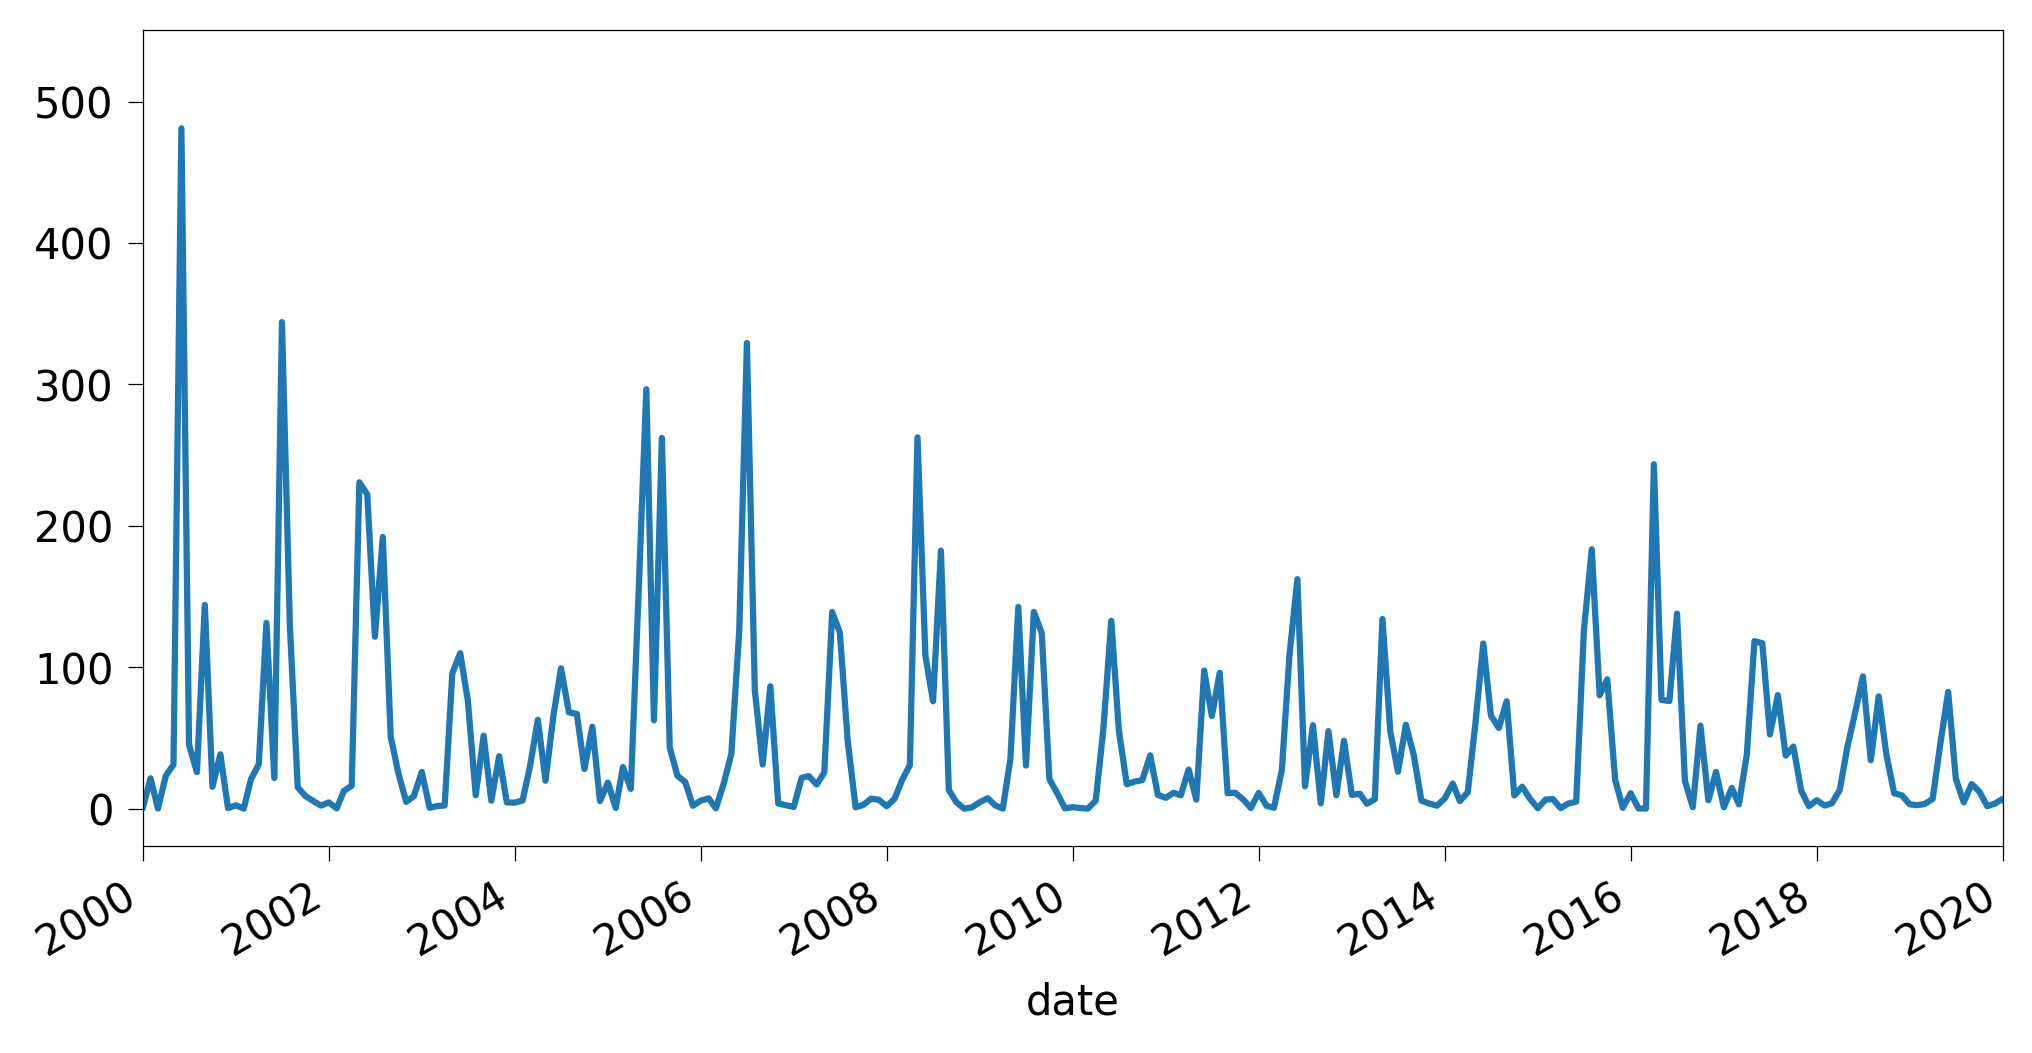

In [21]:
plot_pp(pp_mm, 'Metropolitana_de_Santiago', '2000-01-01','2020-01-01')

### 3c. Función para graficar series históricas de precipitación

In [22]:
def plot_pp_mes(pp_mm, region, years):

    if region not in pp_mm.columns:
        print('Por favor, indica una región que exista en el dataset')
    else:
        df = pp_mm.copy()
        df['month'] = df.index.month
        df['Year'] = df.index.year
        piv = pd.pivot_table(df[df['Year'].isin(years)]  , index=['month'],columns=['Year'], values=[region])
        ax = piv.plot()
        plt.legend(loc='upper left', frameon=False, fontsize = 5)
        plt.show()

### 3d. Gráficos de precipitación mensual para cada año región del Maule

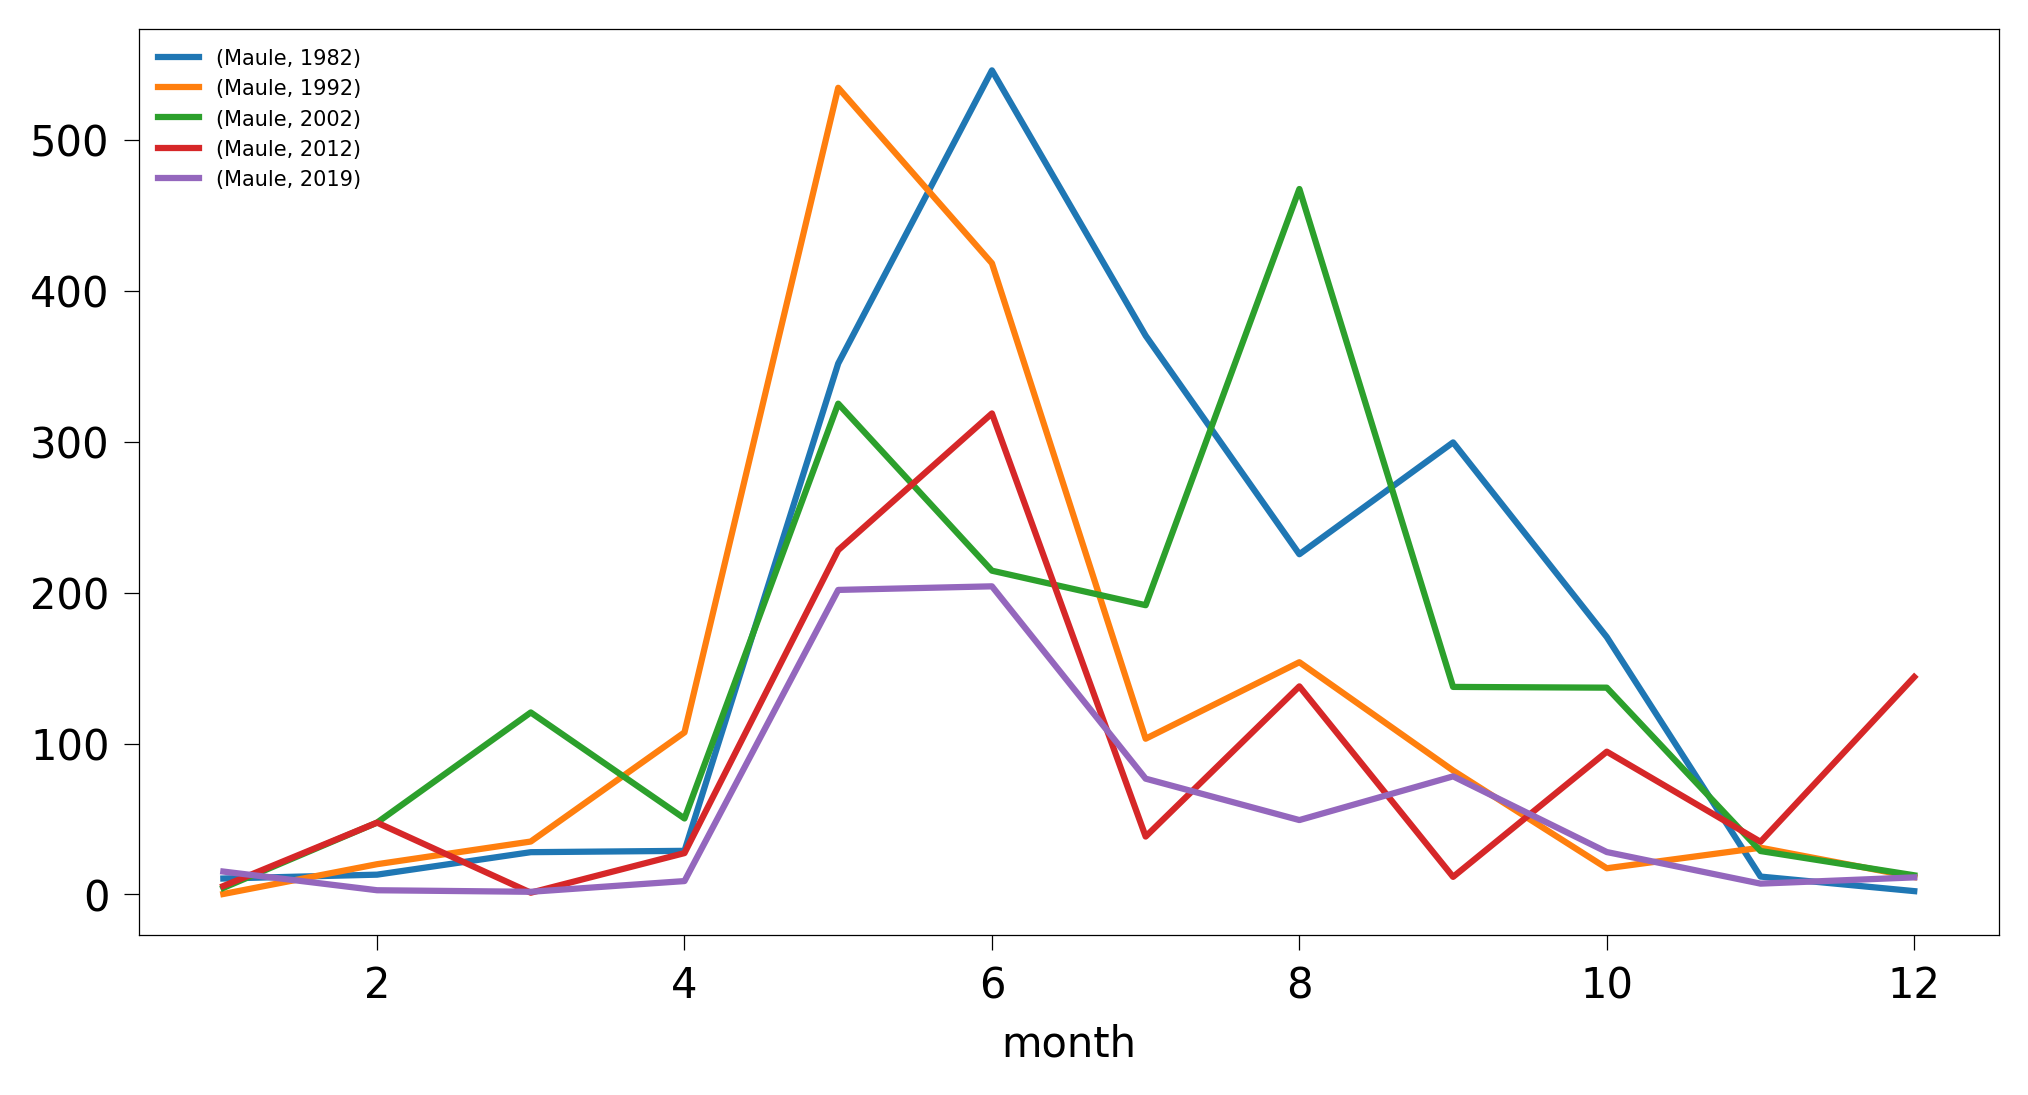

In [23]:
plot_pp_mes(pp_mm, 'Maule', [1982, 1992, 2002, 2012, 2019])

### 3e. Función para graficar 2 PIB

In [24]:
def plot_pib(bco_central, PIB1, PIB2, min_date, max_date):
    df = bco_central.copy()
    df['Periodo'] = pd.to_datetime(df.index,format='%Y-%d-%m %H:%M:%S UTC')#2013-03-01 00:00:00 UTC
    df1 = df[(df.Periodo >= min_date) & (df.Periodo <= max_date)][['Periodo',PIB1,PIB2]].copy()
    ax = df1[[PIB1,PIB2]].sort_index().plot()
    ax.tick_params(axis='both', which='major', labelsize=5, rotation=45)

### 3f. Gráfico del PIB agropecuario y silvícola y del PIB de Servicios financieros

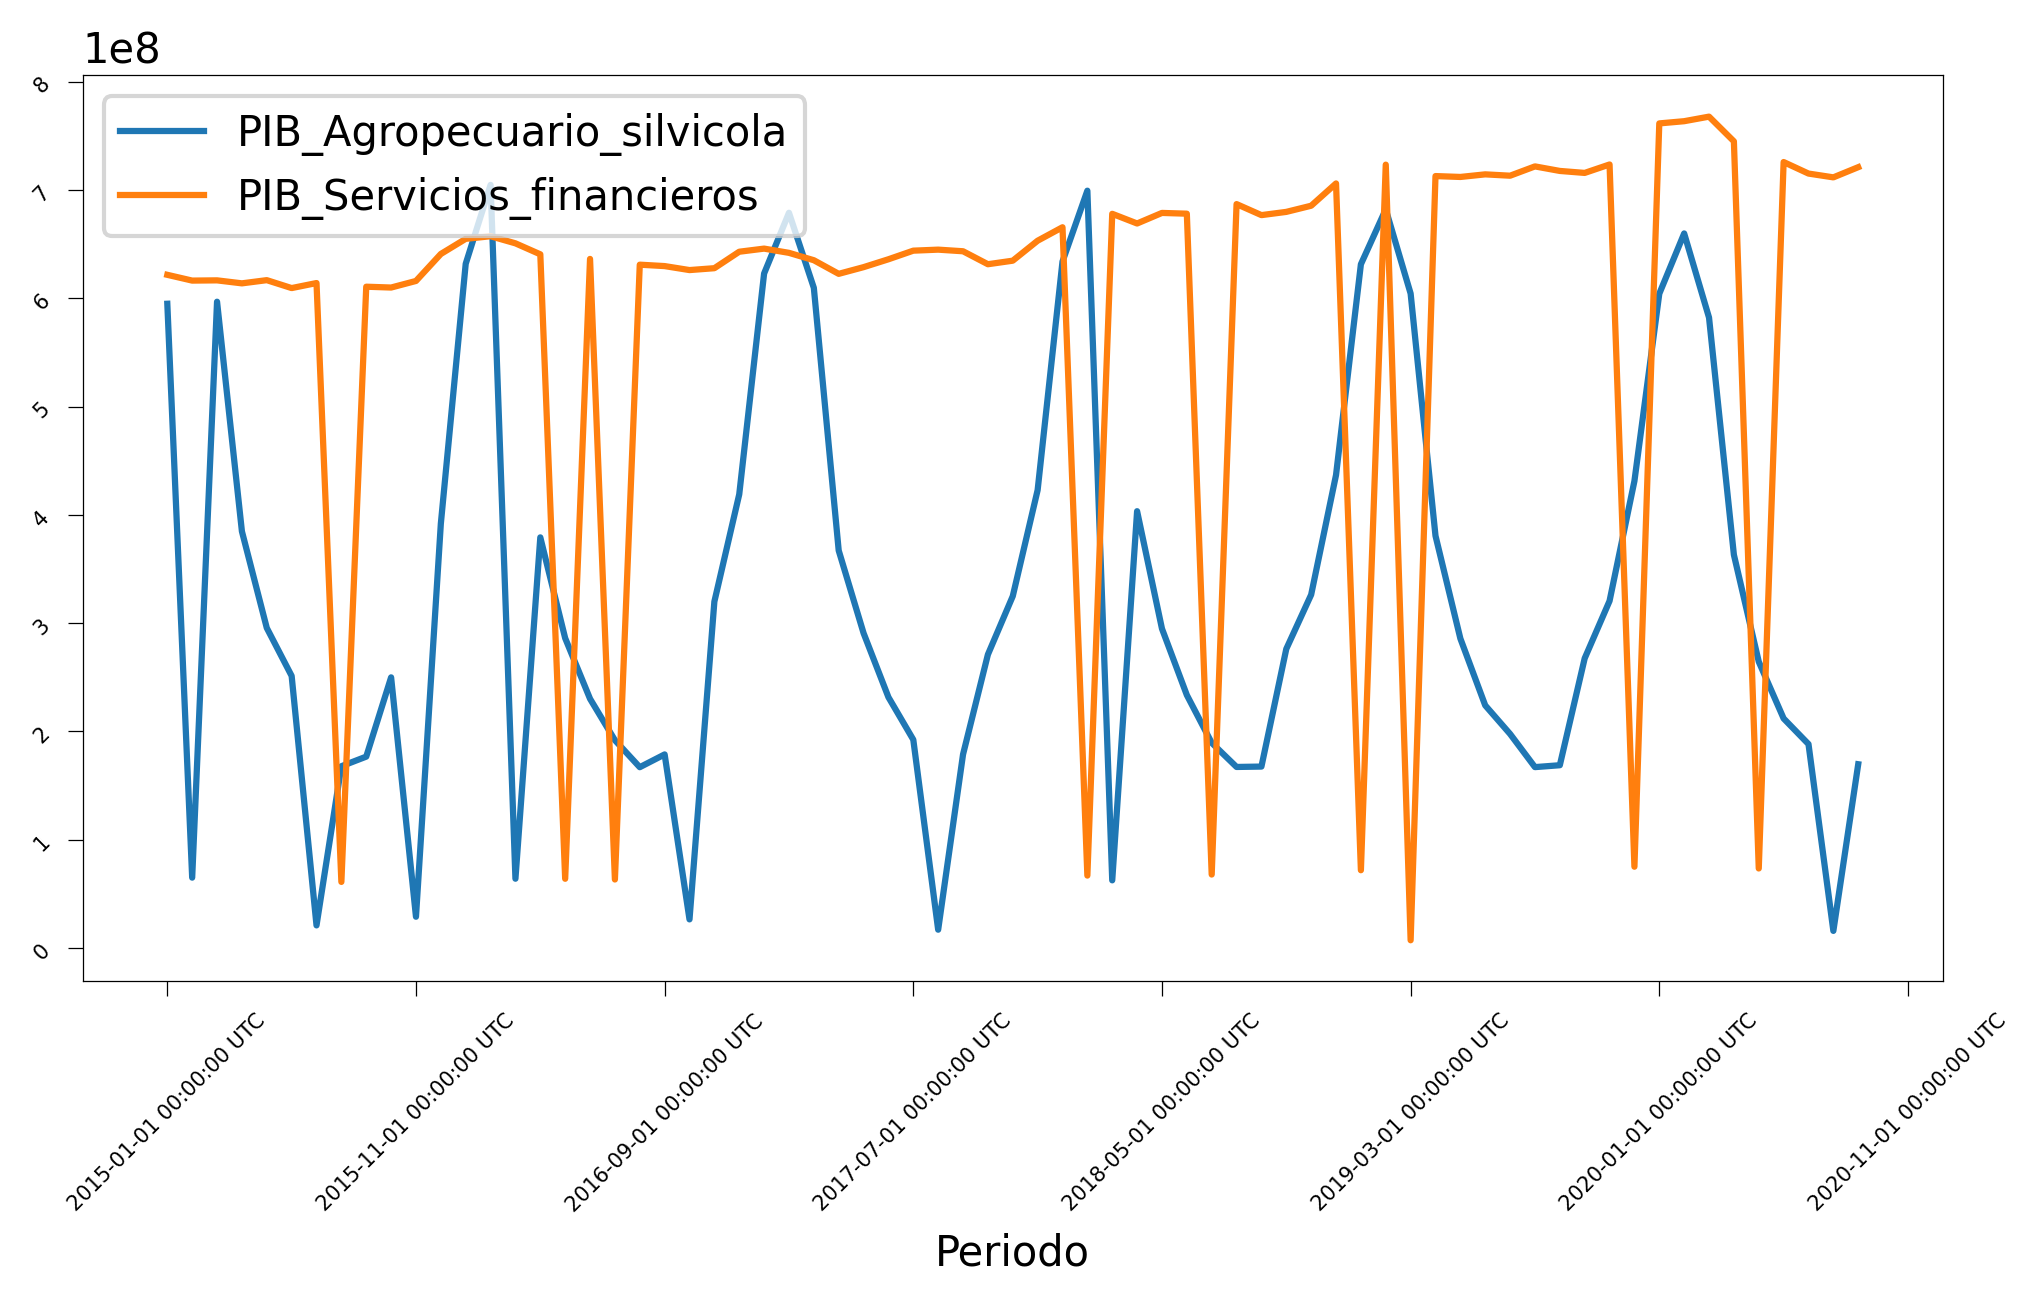

In [25]:
PIB1='PIB_Agropecuario_silvicola'
PIB2='PIB_Servicios_financieros'
min_date = '2015-01-01'
max_date = pd.to_datetime(bco_central.index,format='%Y-%d-%m %H:%M:%S UTC').max()
plot_pib(bco_central, 'PIB_Agropecuario_silvicola', 'PIB_Servicios_financieros', min_date, max_date)

## 4. Tratamiento y creación de variables

### 4a. Correlación
- ¿Cómo podríamos evaluar la correlación entre las distintas series de tiempo y cómo se tienen que correlacionar para entrenar un modelo? 
- ¿Mucha correlación, no correlacionadas, da igual?

- Usando una matriz de correlación de las features.
- Revisando los gráficos de las distintas variables en el tiempo para ver si tienen tendencias similares. Comparar medias y desviaciones estándar. Coeficientes de correlación.
- Lo ideal es usar features que no sean correlacionadas entre sí, para que aporten cosas distintas al modelo y no repetir la información. Además, es bueno tener features que tengan alguna relación con la target.

### 4b. Merge datos con target

In [26]:
leche = pd.read_csv('precio_leche.csv')
leche.head(2)

,Anio,Mes,Precio_leche
0,1979,Ene,3.85
1,1979,Feb,4.58


In [27]:
# Transformo la columna Mes a numérica usando un diccionario
dict_month = pd.DataFrame(leche.Mes.value_counts()).to_dict()['Mes']
for k,kk in enumerate(dict_month):
    dict_month[kk] = k+1
leche = leche.replace({"Mes": dict_month})

# Construyo la variable Periodo para asignarla como índice del dataframe y luego hacer merge con el resto de los datos.
leche['Periodo'] = pd.to_datetime([f'{y}-{m}-01' for y, m in zip(leche.Anio, leche.Mes)],format = '%Y-%m-%d')
leche = leche.set_index('Periodo')

In [28]:
# Transformo los datos de fecha del banco central a datetime en la columna 'Periodo' y los seteo como índice de los datos del banco central
bco_central['Periodo'] = pd.to_datetime(bco_central.index,format='%Y-%d-%m %H:%M:%S UTC')#2013-03-01 00:00:00 UTC
bco_central = bco_central.set_index('Periodo')

In [29]:
# Hago el merge de los datos de pp y del banco central
data = pp_mm.merge(bco_central, how='outer', left_index=True, right_index=True)

# Hago el merce de los datos ya mergeados con la target (datos de precio de leche)
data = data.merge(leche, how='outer', left_index=True, right_index=True)
data

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,Anio,Mes,Precio_leche
1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.94,1.88,738.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.99,1.90,752.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.09,1.89,796.0,NaN,NaN,NaN,

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1076 entries, 1970-01-01 to 2021-02-01
Data columns (total 95 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Coquimbo                                                                            496 non-null    float64
 1   Valparaiso                                                                          496 non-null    float64
 2   Metropolitana_de_Santiago                                                           496 non-null    float64
 3   Libertador_Gral__Bernardo_O_Higgins                                                 496 non-null    float64
 4   Maule                                                                               496 non-null    float64
 5   Biobio                                                                         

### 4c. Construcción de variables 

In [31]:
data['year'] = data.index.year
data['month'] = data.index.month
data['trimester'] = data.index.quarter

In [32]:
data

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,Anio,Mes,Precio_leche,year,month,trimester
1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.94,1.88,738.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,1,1
1970-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.99,1.90,752.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,1,1
1970-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Al revisar el dataframe hay muchos datos nulos, procedería rellenando los datos nulos para luego construir un modelo de regresión.

#### Perdón! no alcancé a terminar :( pero sé hacer el modelo, no sé si es posible entregarlo mañana.